In [1]:
import numpy as np
import pandas as pd

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

#from warnings import filterwarnings
#filterwarnings("ignore")

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor


**1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.**

**Reading the Data:**

In [2]:
# Reading 1st five Rows of the Dataset

comp = pd.read_excel("compactiv.xlsx")

In [3]:
comp.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [4]:
# Reading last five Rows of the Dataset
comp.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [5]:
comp.shape

(8192, 22)

In [6]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

* The dataset contains 8192 Rows and 22 columns.
* There are 13 float , 8 int64 and 1 object datatype present in the data.
* There are Null values present in rchar and wchar columns of the dataset.

In [7]:
comp.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

**Five point Summary:**

* There are many Zero enteries present in the columns.
* Also the data seems to be Skewed mostly Right Skwewd and usr column is left skewed.
* There is huge difference in the Min and Max values which shows the presence of Outliers.

In [8]:
comp['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [9]:
comp['usr'].unique()

array([95, 97, 87, 98, 90, 96, 89,  0, 92, 75, 94, 85, 93, 59, 83, 81, 56,
       57, 86, 88, 72, 99, 82, 61, 73, 91, 71, 77, 74, 84, 70, 76, 80, 66,
       78, 54, 60, 79, 65, 69, 68,  1, 58, 64, 63, 55, 49, 67, 50, 48, 62,
        2, 53, 51, 46, 52], dtype=int64)

In [10]:
comp.head(1)

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   

   ...  pgscan  atch  pgin  ppgin  pflt  vflt     runqsz  freemem freeswap  \
0  ...     0.0   0.0   1.6    2.6  16.0  26.4  CPU_Bound     4670  1730946   

   usr  
0   95  

[1 rows x 22 columns]

In [11]:
comp.describe().columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [12]:
# Making a copy of the database

compactive = comp.copy()

In [13]:
compactive.shape

(8192, 22)

In [14]:
compactive.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

**Univariate Analysis:**

* Histogram of all Continuous Variables:

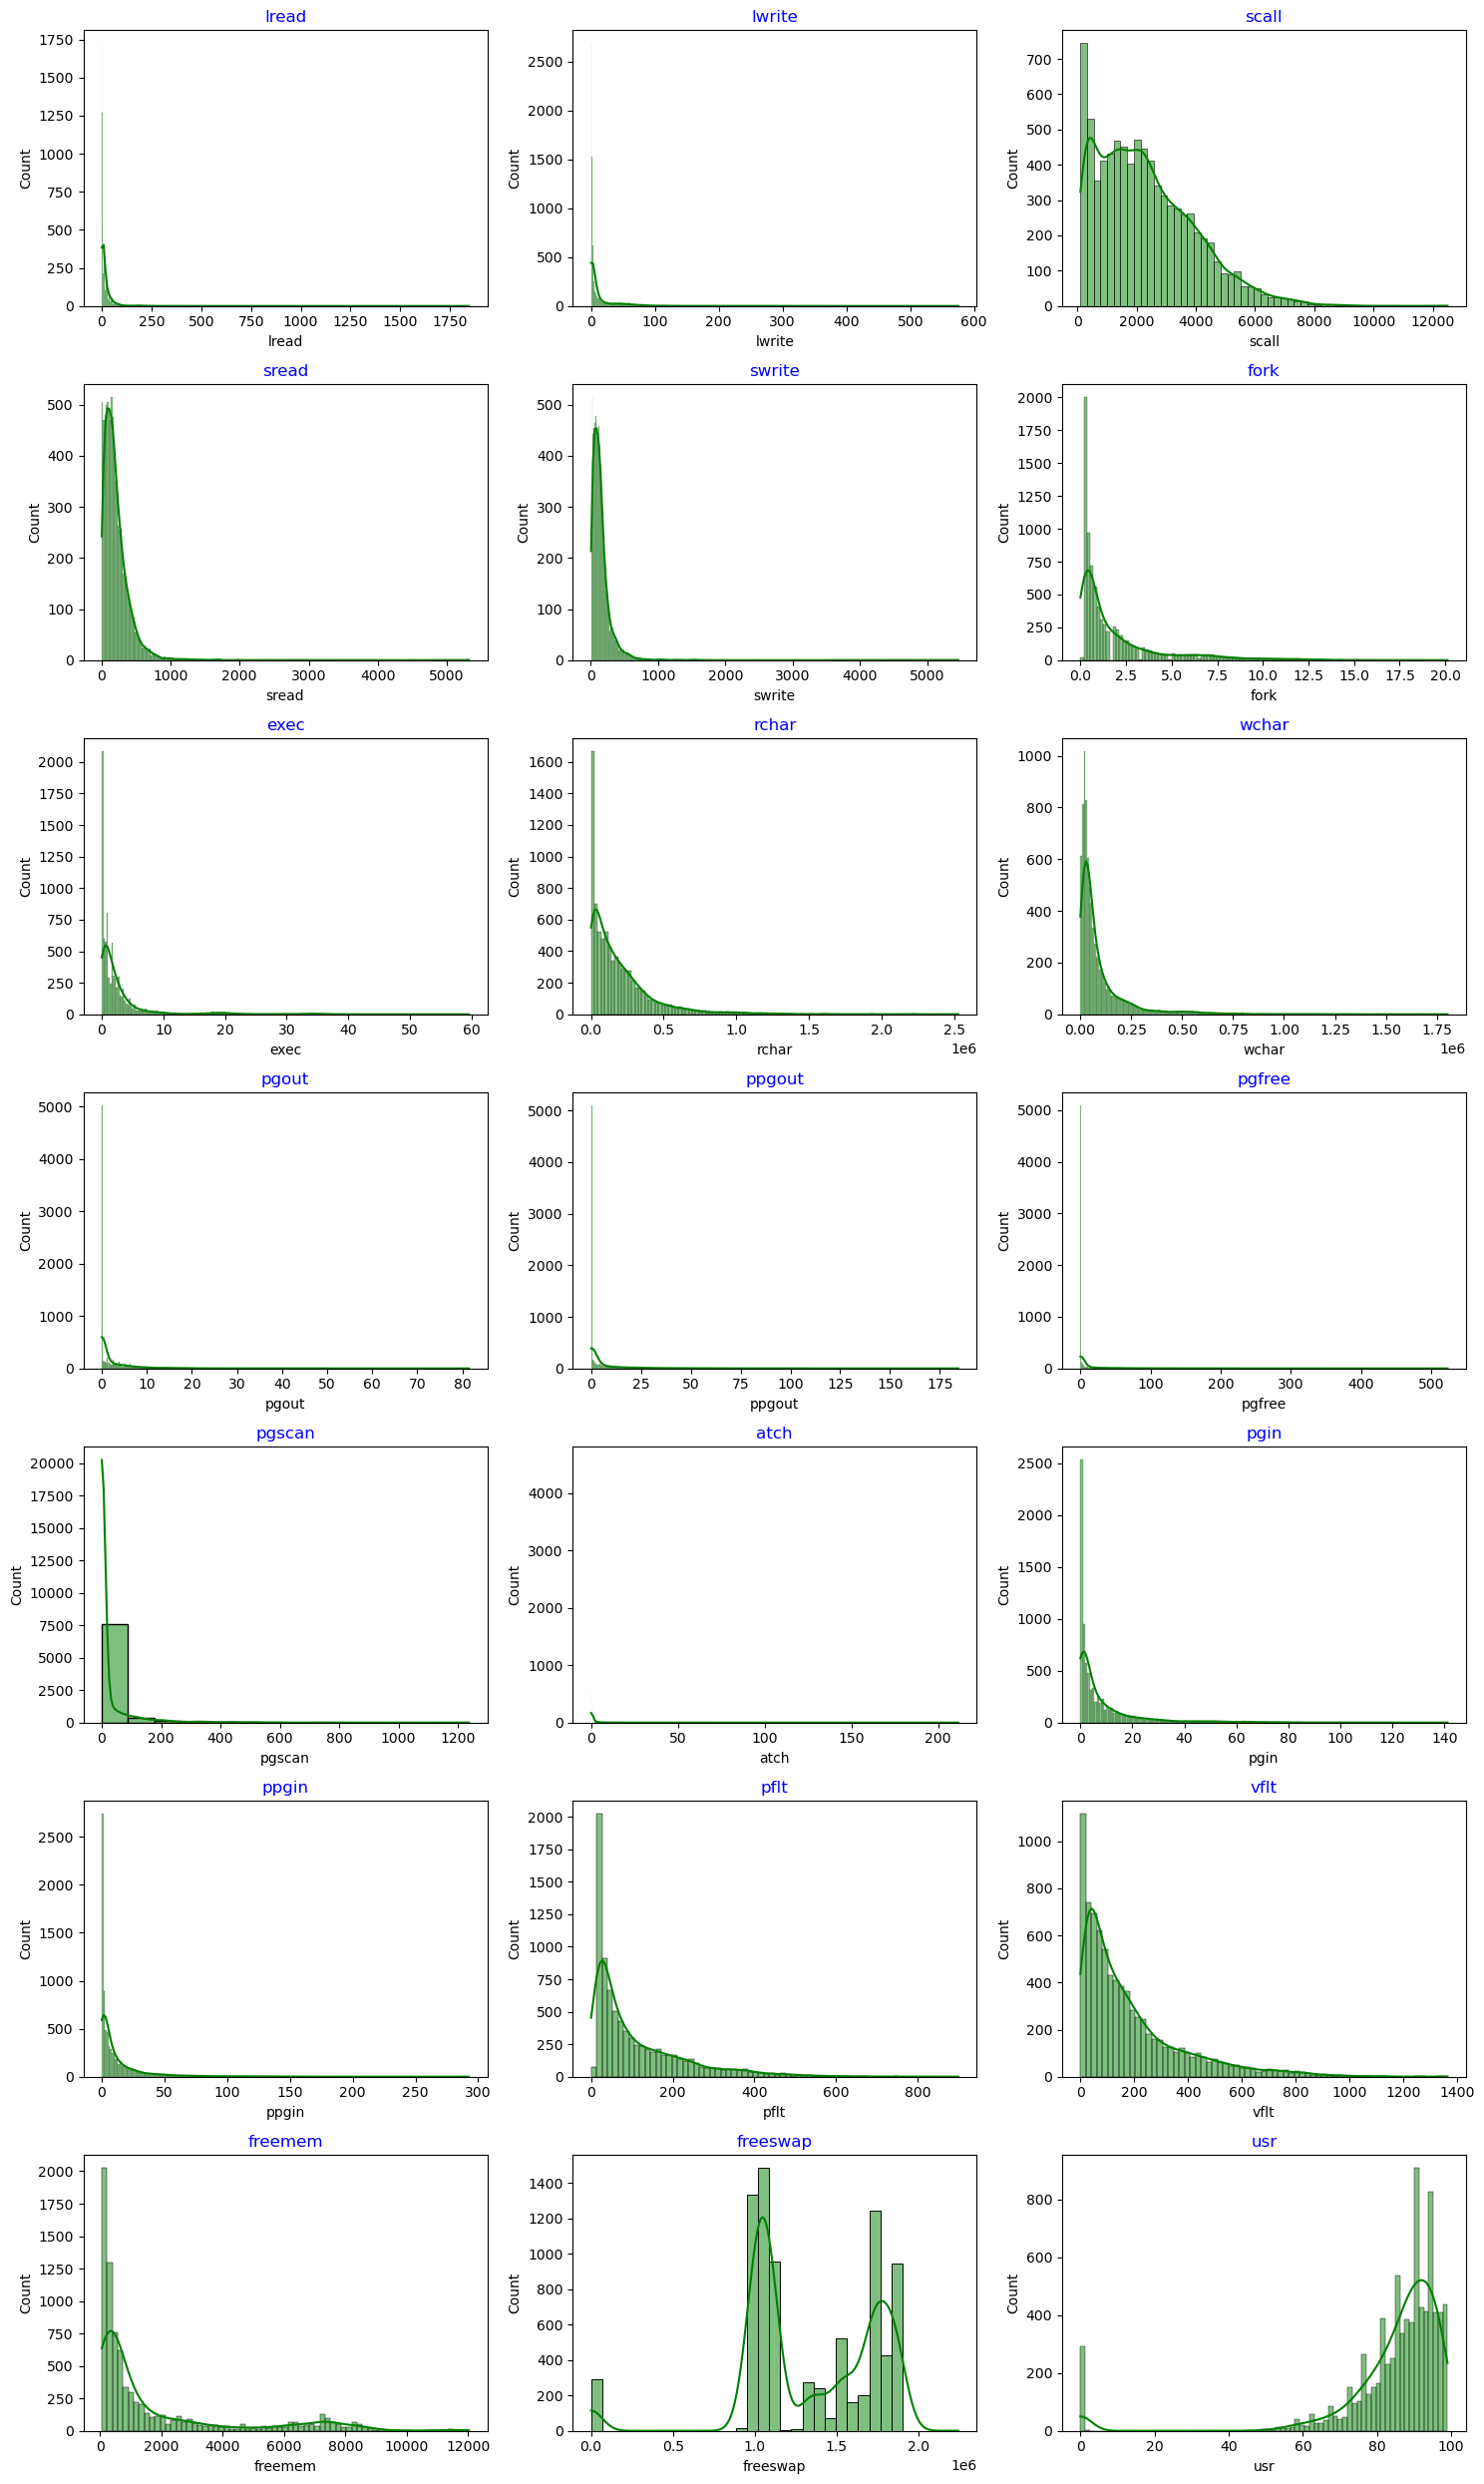

In [15]:
fig=plt.figure(figsize=(15,25))
for i in range(0,len(compactive.describe().columns)):
   ax=fig.add_subplot(7,3,i+1)
   sns.histplot(compactive[compactive.describe().columns[i]],kde=True,color='green')
   ax.set_title(compactive.describe().columns[i],color='blue')
plt.tight_layout()
plt.show()

**Observations:**

* We can clear see that none of the column is Normally distributed.
* Almost all the features is Right Skewed and Shows the Presence of Outliers in the data.
* The Target column 'Usr' is Left Skewed.

**Countplot of categorical variable:**

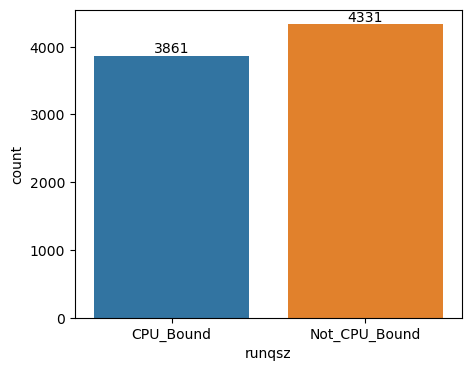

In [16]:
#fig.set_size_inches(10,18)
plt.figure(figsize=(5,4))
ax= sns.countplot(x='runqsz',data=compactive)
for bars in ax.containers:
    ax.bar_label(bars)


**Observations:**
* Process run queue size ,this value should be less than 2 means the system is Not_CPU_Bound.
* System being Not_CPU_Bound is more in numbers as compared to CPU_Bound.

**Boxplot of all Continuous variables:**

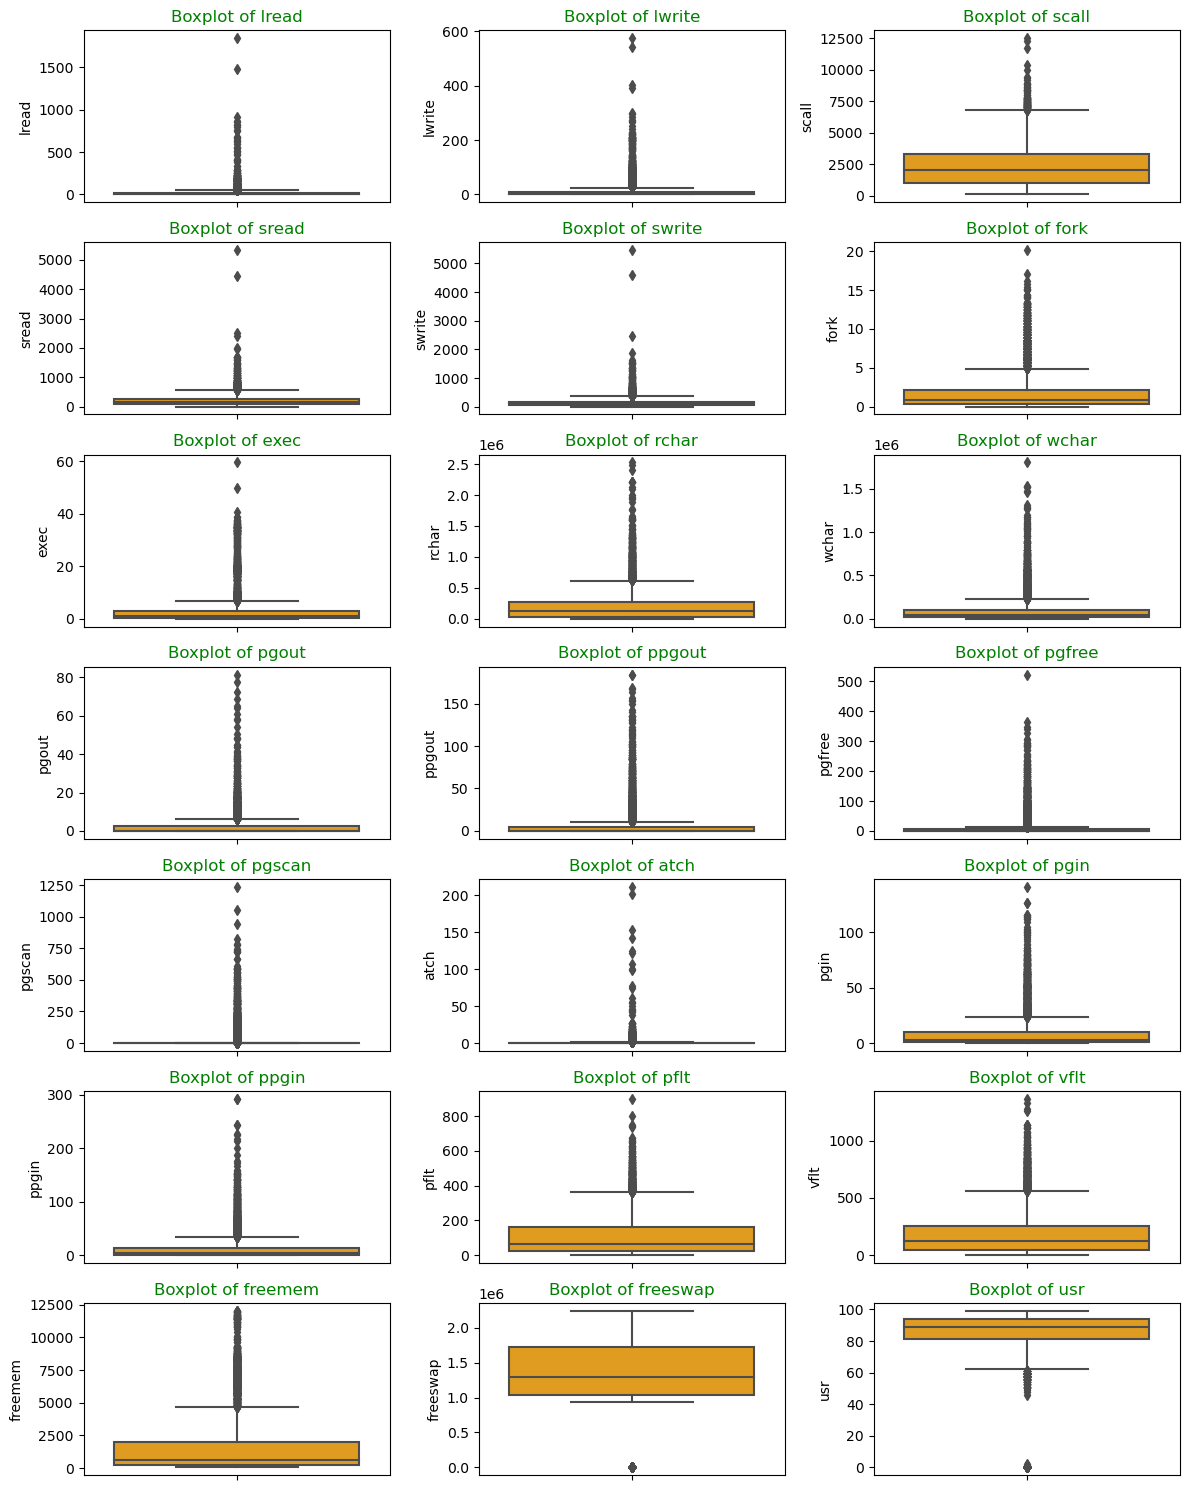

In [17]:
plt.figure(figsize=(12,15))
feature_list = compactive.describe().columns
for i in range (len(feature_list)):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=compactive[feature_list[i]],data=compactive,color='orange')
    plt.title("Boxplot of {}".format(feature_list[i]),color ='green')
    plt.tight_layout()
    #plt.show()

**Observations:**

* There are Outliers present in all the Numeric Columns.
* All the Columns are Right Skewed Except the columns freeswap and Usr which are Left Skewed.

**Bivariate Analysis:**

<Axes: xlabel='usr', ylabel='lread'>

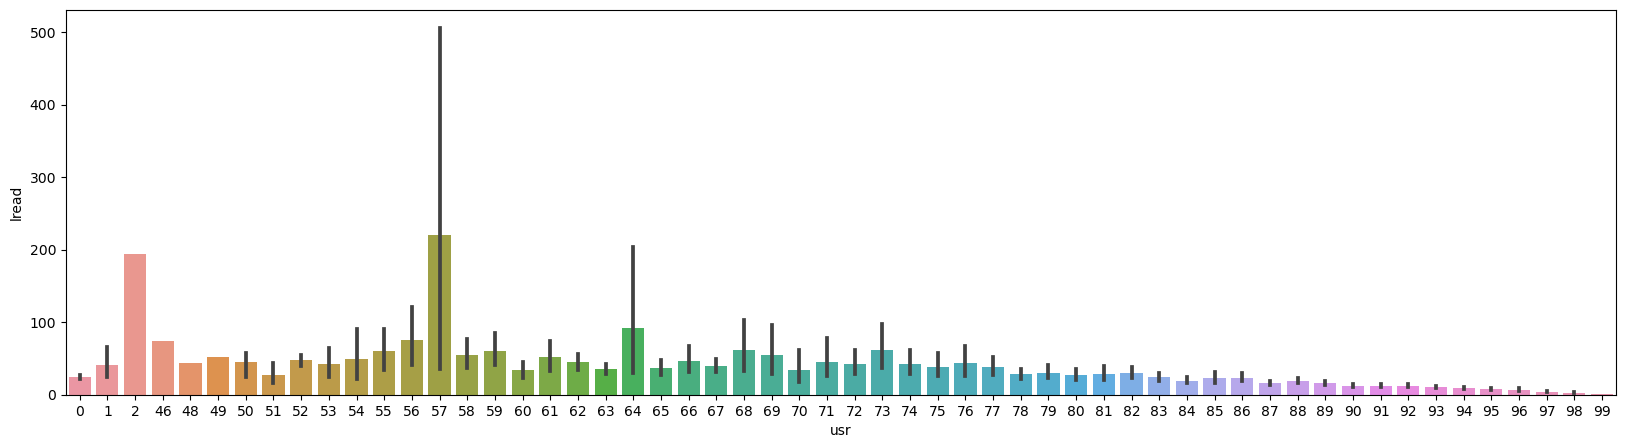

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(data=compactive,y='lread',x='usr')

* Two unusual trends can be seen when comparing the number of reads per second with the CPUs running in user mode.

<Axes: xlabel='usr', ylabel='lwrite'>

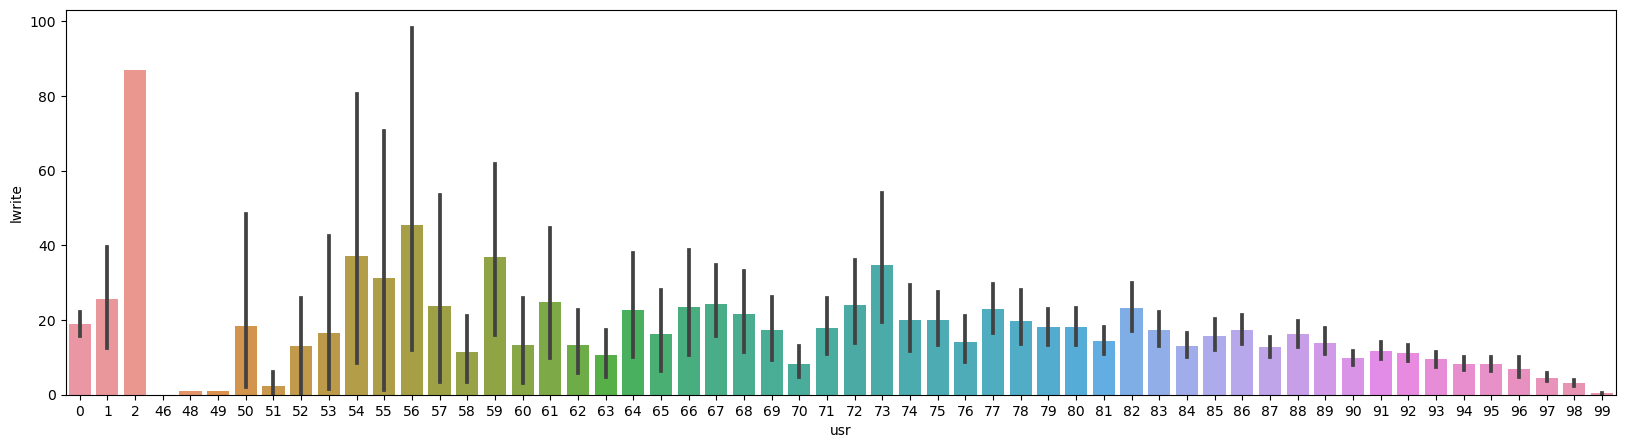

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(data=compactive,y='lwrite',x='usr')

**Observations:**

* We can observe that when the number or write is high, only 2% of the CPU runs in user mode.
* This indicates that when the read/write is high, the majority of the CPU does not run in user mode.

**Multivariate Analysis:**

**Correlation Matrix**

In [19]:
#comp.describe().columns.corr()
corr = compactive.corr()
corr

C:\Users\Shobha\AppData\Local\Temp\ipykernel_2984\1081335210.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = compactive.corr()


lread    lwrite     scall     sread    swrite      fork  \
lread     1.000000  0.533737  0.191377  0.132881  0.119953  0.140284   
lwrite    0.533737  1.000000  0.143404  0.128403  0.101524  0.052511   
scall     0.191377  0.143404  1.000000  0.696887  0.619984  0.446766   
sread     0.132881  0.128403  0.696887  1.000000  0.881069  0.416721   
swrite    0.119953  0.101524  0.619984  0.881069  1.000000  0.376876   
fork      0.140284  0.052511  0.446766  0.416721  0.376876  1.000000   
exec      0.110965  0.038237  0.308999  0.164084  0.103643  0.763974   
rchar     0.107973  0.115121  0.351413  0.502397  0.331386  0.281229   
wchar     0.081571  0.091718  0.274092  0.401784  0.394230  0.060790   
pgout     0.082463  0.067013  0.194529  0.193679  0.151371  0.130192   
ppgout    0.130590  0.079485  0.208400  0.225906  0.159442  0.166872   
pgfree    0.114438  0.065692  0.199778  0.212911  0.145458  0.168082   
pgscan    0.087783  0.042608  0.177908  0.194272  0.120180  0.160839   
atch      0.021563  0.028310  0.077969  0.085468  0.061373  0.047194   
pgin      0.189799  0.091068  0.241628  0.207012  0.147000  0.163468   
ppgin     0.161345  0.089011  0.219070  0.210225  0.144278  0.132181   
pflt      0.137463  0.067024  0.481781  0.452020  0.396580  0.931040   
vflt      0.165539  0.094965  0.531760  0.491045  0.416571  0.939348   
freemem  -0.083214 -0.091133 -0.387520 -0.286437 -0.248574 -0.123357   
freeswap -0.081293 -0.116478 -0.350629 -0.302036 -0.237062 -0.130442   
usr      -0.141394 -0.111213 -0.323188 -0.332160 -0.272252 -0.363277   

              exec     rchar     wchar     pgout  ...    pgfree    pgscan  \
lread     0.110965  0.107973  0.081571  0.082463  ...  0.114438  0.087783   
lwrite    0.038237  0.115121  0.091718  0.067013  ...  0.065692  0.042608   
scall     0.308999  0.351413  0.274092  0.194529  ...  0.199778  0.177908   
sread     0.164084  0.502397  0.401784  0.193679  ...  0.212911  0.194272   
swrite    0.103643  0.331386  0.394230  0.151371  ...  0.145458  0.120180   
fork      0.763974  0.281229  0.060790  0.130192  ...  0.168082  0.160839   
exec      1.000000  0.169189  0.000547  0.111465  ...  0.146163  0.144855   
rchar     0.169189  1.000000  0.503531  0.211268  ...  0.277786  0.259446   
wchar     0.000547  0.503531  1.000000  0.192436  ...  0.159229  0.113638   
pgout     0.111465  0.211268  0.192436  1.000000  ...  0.730381  0.553916   
ppgout    0.149334  0.269160  0.188876  0.872445  ...  0.917790  0.785256   
pgfree    0.146163  0.277786  0.159229  0.730381  ...  1.000000  0.915217   
pgscan    0.144855  0.259446  0.113638  0.553916  ...  0.915217  1.000000   
atch      0.052307  0.171532  0.181408  0.147759  ...  0.069290  0.038693   
pgin      0.186099  0.299784  0.178290  0.385648  ...  0.532834  0.496826   
ppgin     0.149911  0.347224  0.200880  0.414865  ...  0.593396  0.564991   
pflt      0.645239  0.313246  0.086128  0.151285  ...  0.190468  0.179157   
vflt      0.691754  0.363799  0.111082  0.229129  ...  0.301851  0.283031   
freemem  -0.158565 -0.149485 -0.149060 -0.269687  ... -0.234195 -0.193580   
freeswap -0.153347 -0.220608 -0.226044 -0.245378  ... -0.210184 -0.178119   
usr      -0.288526 -0.329737 -0.288974 -0.221877  ... -0.216278 -0.181488   

              atch      pgin     ppgin      pflt      vflt   freemem  \
lread     0.021563  0.189799  0.161345  0.137463  0.165539 -0.083214   
lwrite    0.028310  0.091068  0.089011  0.067024  0.094965 -0.091133   
scall     0.077969  0.241628  0.219070  0.481781  0.531760 -0.387520   
sread     0.085468  0.207012  0.210225  0.452020  0.491045 -0.286437   
swrite    0.061373  0.147000  0.144278  0.396580  0.416571 -0.248574   
fork      0.047194  0.163468  0.132181  0.931040  0.939348 -0.123357   
exec      0.052307  0.186099  0.149911  0.645239  0.691754 -0.158565   
rchar     0.171532  0.299784  0.347224  0.313246  0.363799 -0.149485   
wchar     0.181408  0.178290  0.200880  0.086128  0.111082 -0.149060   
pgout     0.1

**Heatmap**

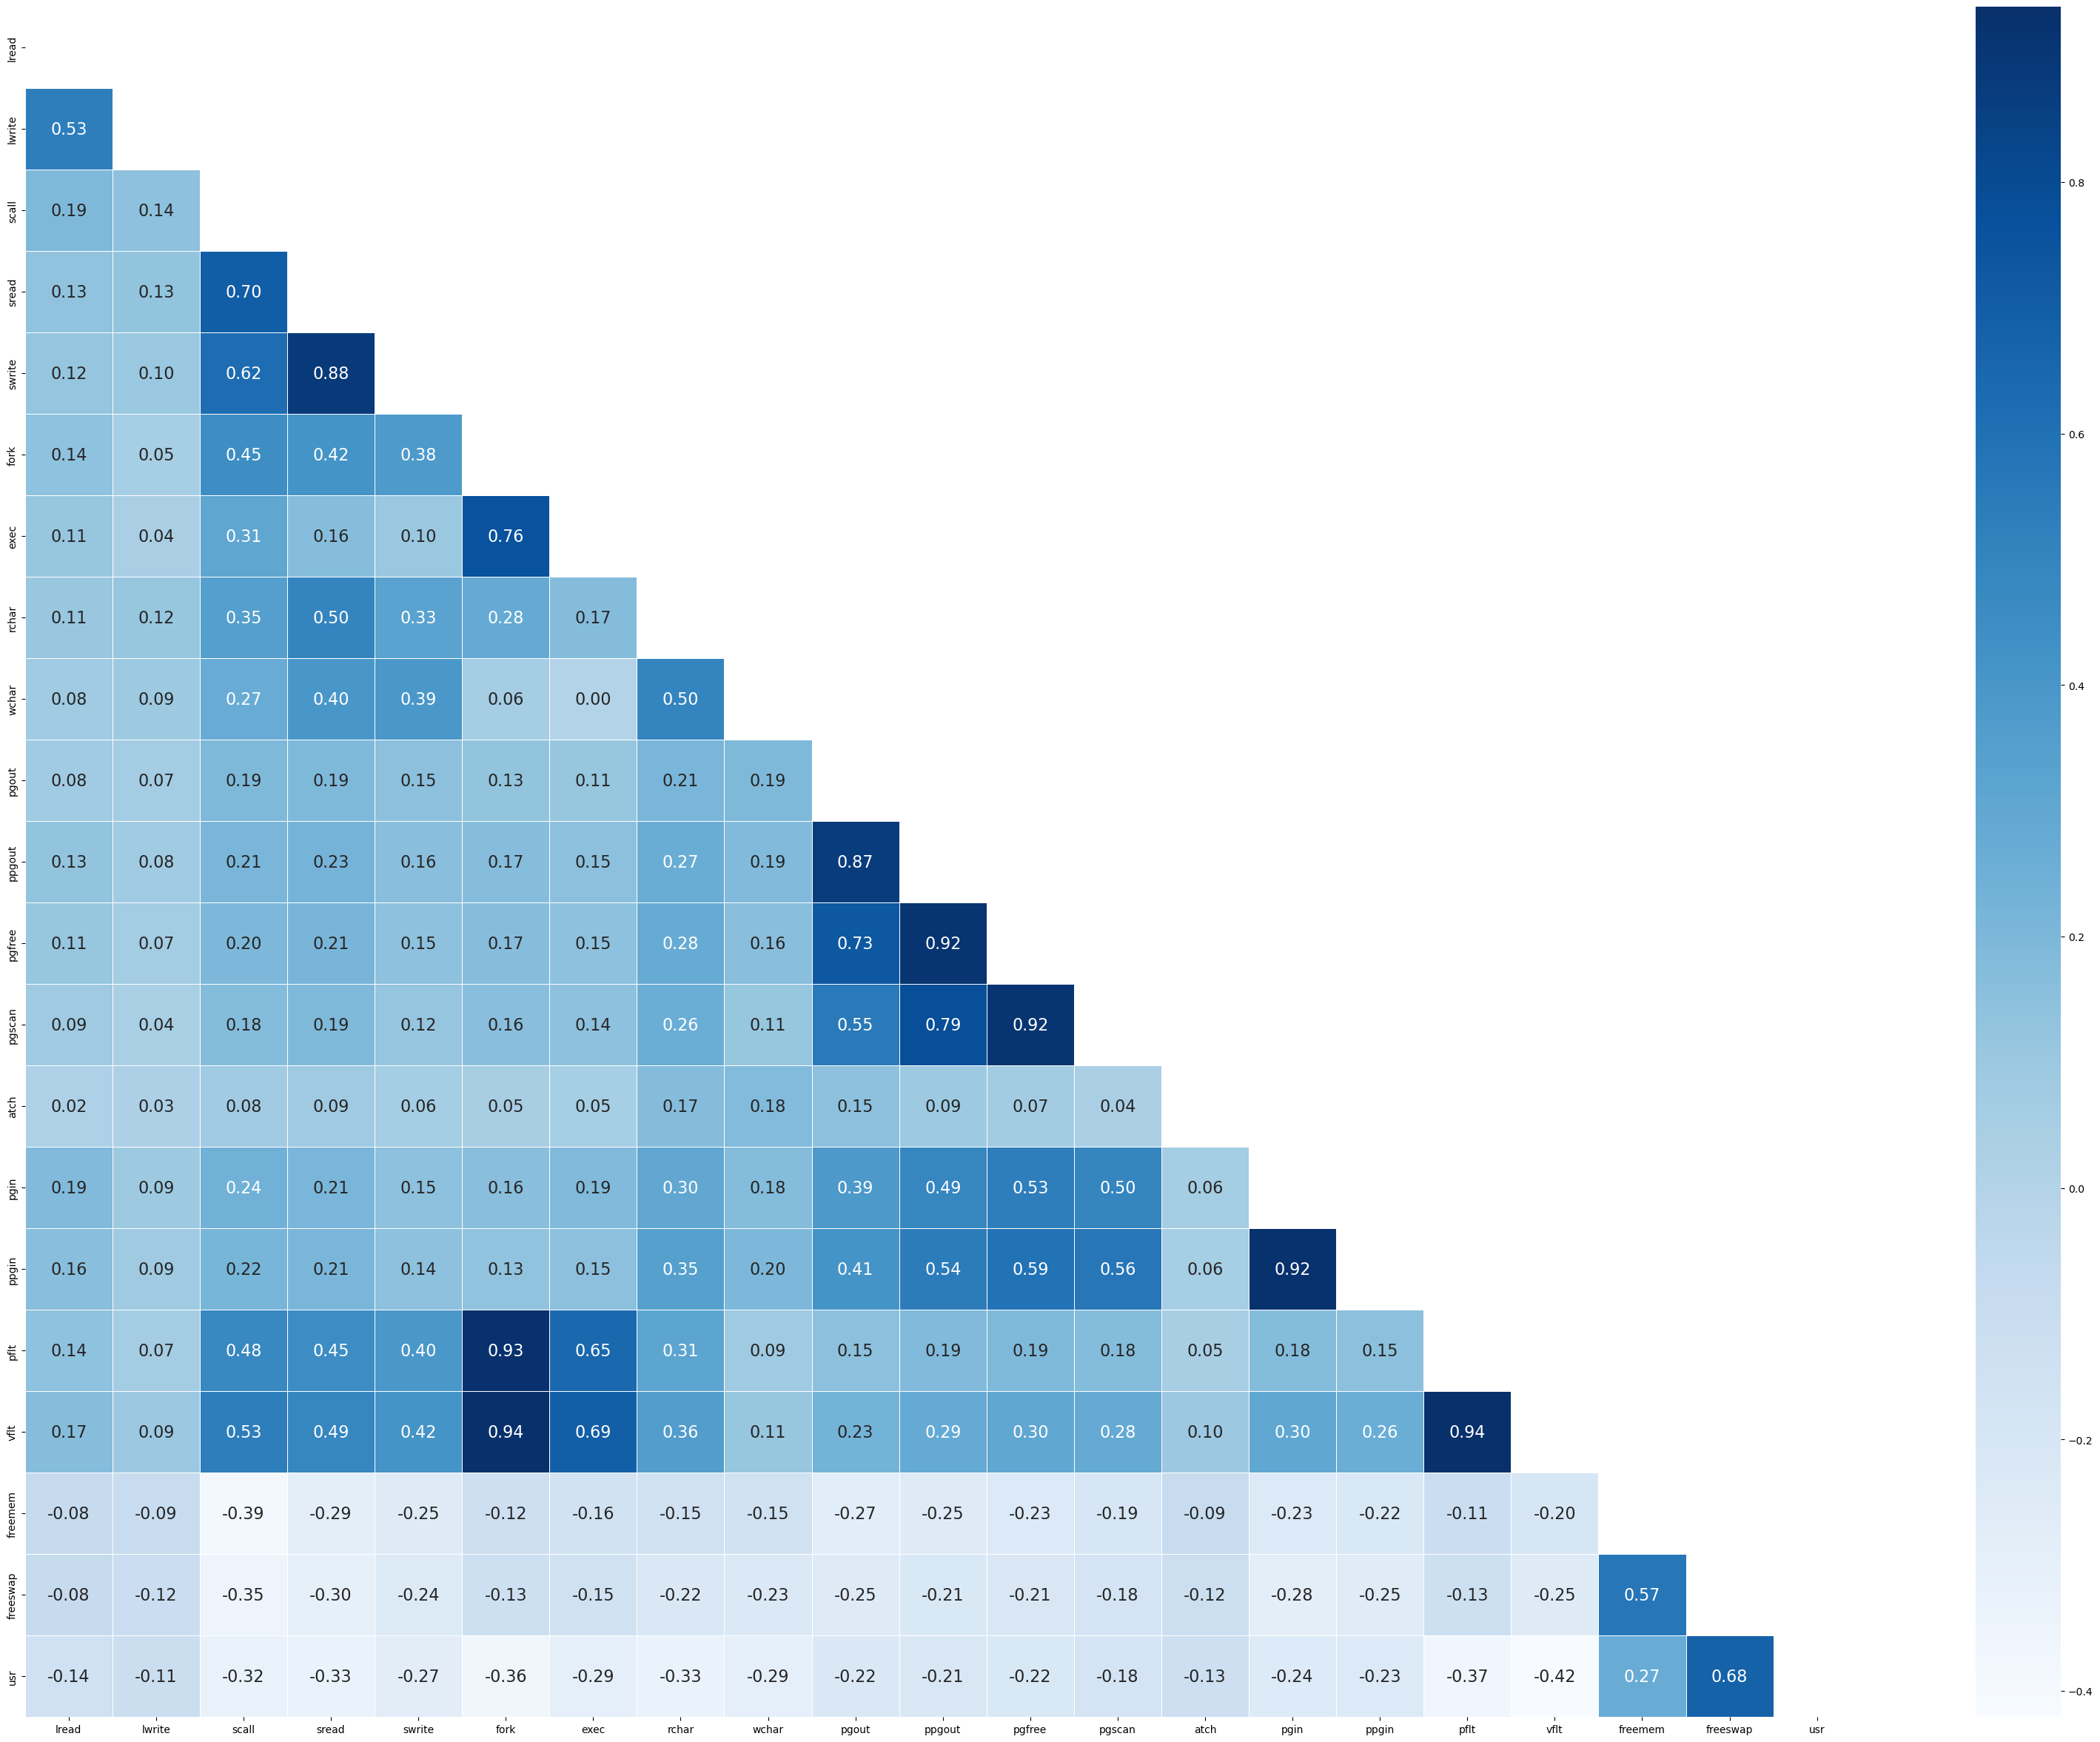

In [20]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
fig = plt.subplots(figsize=(40,30))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask,cmap = "Blues",annot_kws={"size": 16},linewidths=0.5)
plt.show()

**Observations:**

* variable exec Pfit and Vfit are highly Correlated to fork having a correlation of 0.76, 0.93 and       0.94 respectively.
* swrite is correlated to sread with 0.88 magnitude.
* From the analysis we can see the presence of correlations.


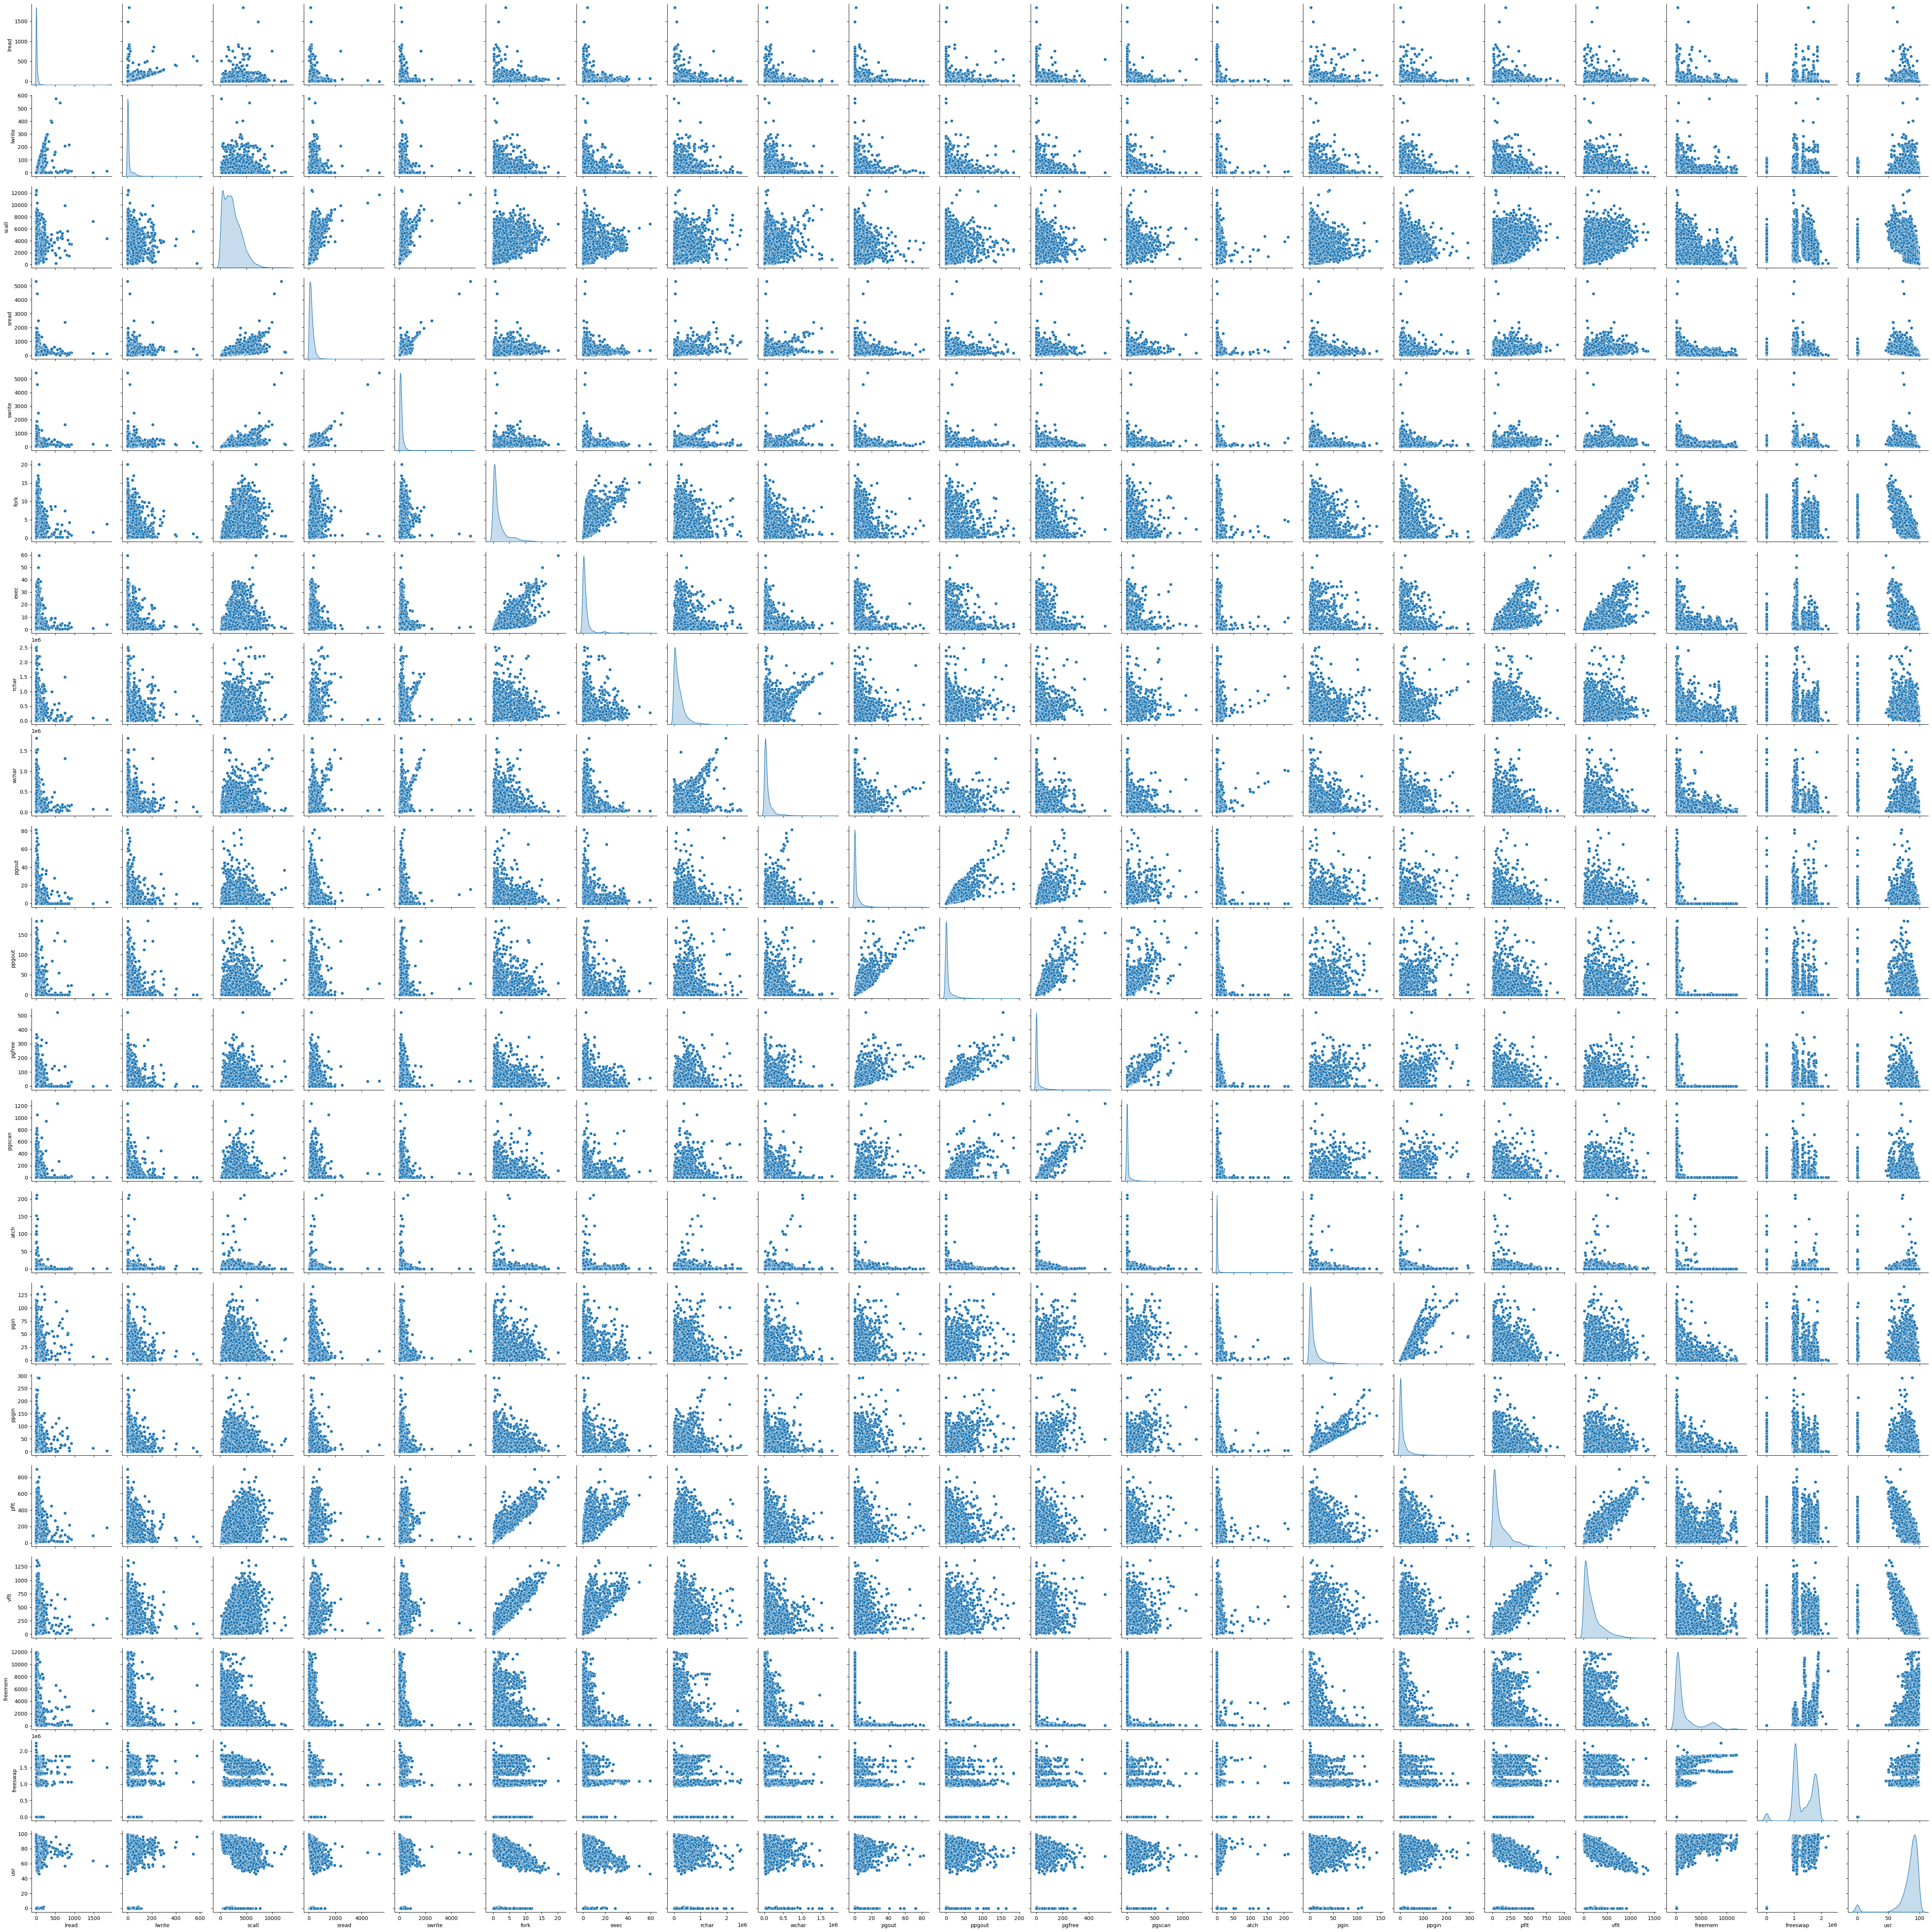

In [21]:
sns.pairplot(compactive,diag_kind="kde")

* There is strong positive correlation between the target variable usr and the predictor variables freemem and freeswap.

**1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.**

**Checking NULL Vaalues**

In [22]:
comp.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

* There are Null Values present in rchar and wchar columns. 
* We can impute the Null values with the median values.
* We can't use mean to impute Null values since Outliers are present in the column.

**Null Value Treatment**

In [23]:
# Let's replace the missing values with median values of the columns.
# Respective column's missing value is replaced with that column's median respectively

medianfiller = lambda x : x.fillna(x.median())
compactive['rchar'] = compactive[['rchar']].apply(medianfiller,axis=0)
compactive['wchar'] = compactive[['wchar']].apply(medianfiller,axis=0)

In [24]:
compactive[['rchar','wchar']].isnull().sum()

rchar    0
wchar    0
dtype: int64

In [25]:
compactive.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

**check for the values which are equal to zero**

* From the Statistical Summary above It has been observed that there are 0s present for many columns.
* We do not need to drop all the rows with Zero values.
* These are all valid values as it is related to the activities being done in the computer system.
* we also observe that column pgscan is having all the vales as Zero from min to 75% percentile and there is only max value of 1237.00 which we need to consider for deleting since after the Outlier treatment all the values will be Zero then.


**Checking for Duplicates**

In [26]:
dups = compactive.duplicated().sum()
print("Number of Duplicate Rows Present: ",dups)

Number of Duplicate Rows Present:  0


**Outlier Treatment**

* The linear regression model is quite sensitive to outliers in the data set. If we
do not treat outliers, our model is likely to make inaccurate predictions.
* Treating Outlier using IQR

In [27]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [28]:
# Cap & floor the values beyond the outlier boundaries
#data_plot=comp[comp.dtypes[comp.dtypes!='object'].index]
#colname = comp.describe().columns

feature_list= compactive.describe().columns
for i in feature_list:
    LL,UL = remove_outlier(compactive[i])
    compactive[i] = np.where(compactive[i] > UL,UL,compactive[i])
    compactive[i] = np.where(compactive[i]< LL,LL,compactive[i])

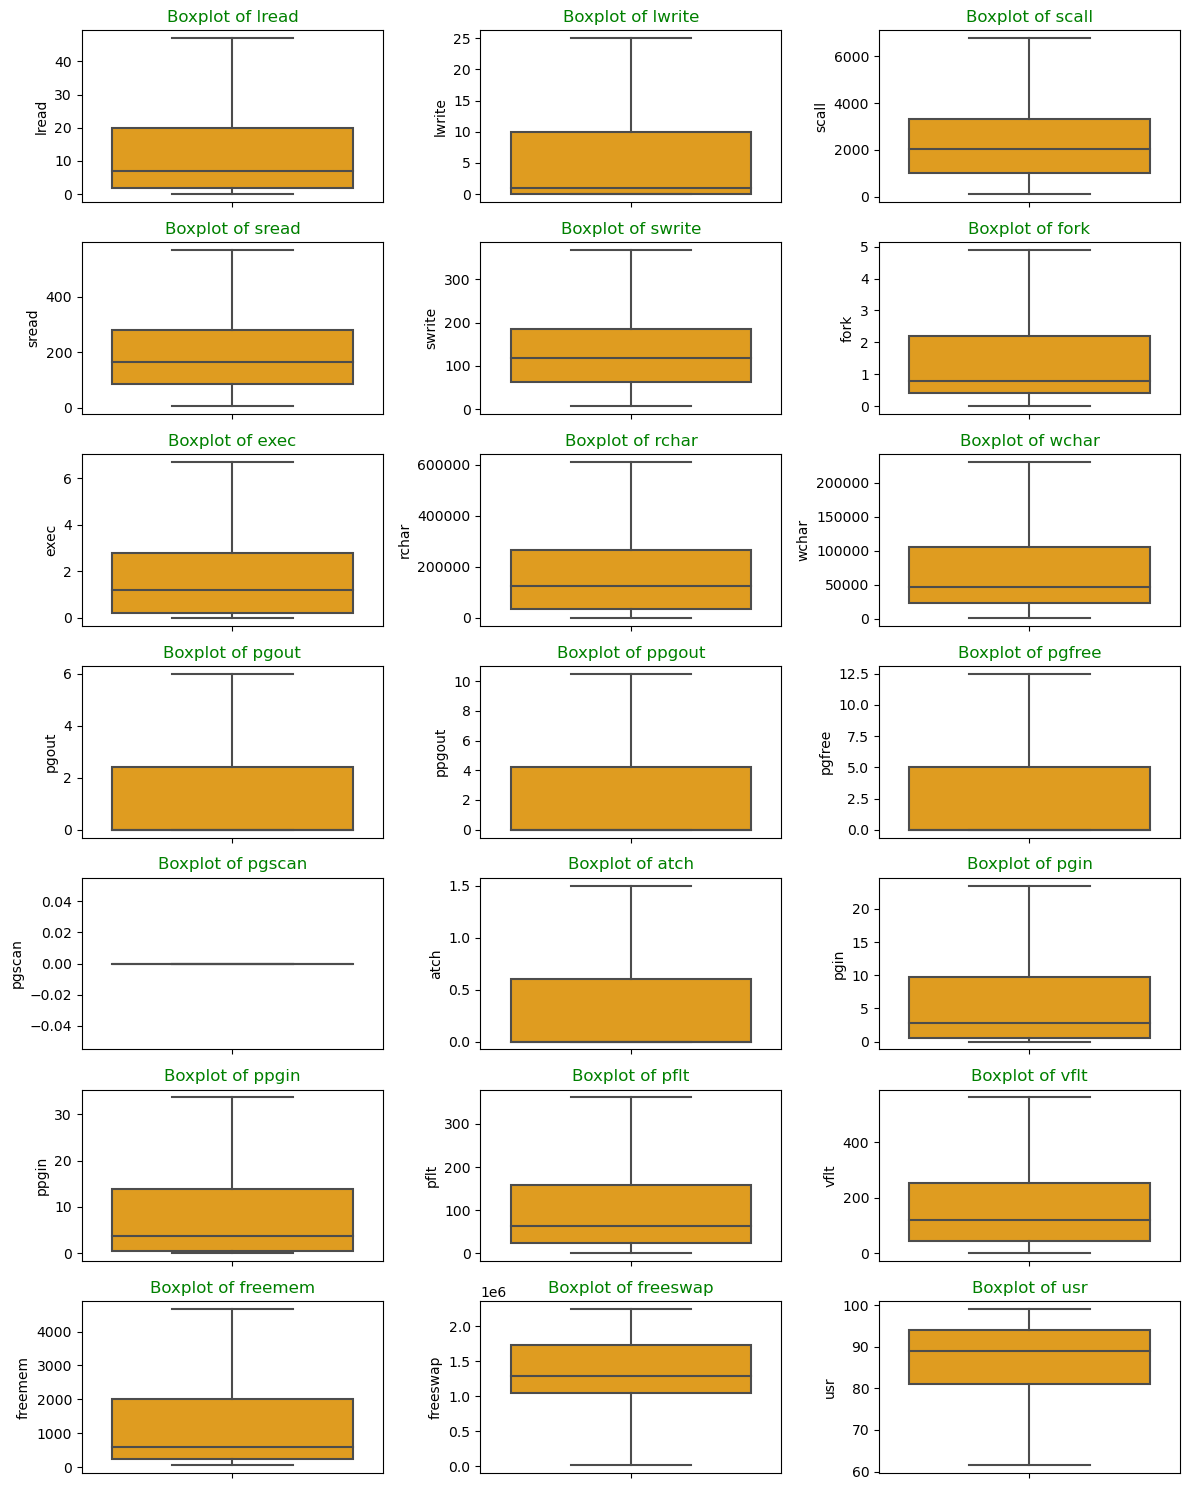

In [29]:
plt.figure(figsize=(12,15))
feature_list = compactive.describe().columns
for i in range (len(feature_list)):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=compactive[feature_list[i]],data=compactive,color='orange')
    plt.title("Boxplot of {}".format(feature_list[i]),color='green')
    plt.tight_layout()
    #plt.show()

In [30]:
compactive['pgscan'].describe()

count    8192.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: pgscan, dtype: float64

* After the Outlier treatment we observe that the column pgscan have all the vales as Zeros so we need to delete this column before model building.


In [31]:
compactive[compactive['pgscan']==0]

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  \
0       1.0     0.0  2147.0   79.0    68.0   0.2  0.20   40671.0  53995.0   
1       0.0     0.0   170.0   18.0    21.0   0.2  0.20     448.0   8385.0   
2      15.0     3.0  2162.0  159.0   119.0   2.0  2.40  125473.5  31950.0   
3       0.0     0.0   160.0   12.0    16.0   0.2  0.20  125473.5   8670.0   
4       5.0     1.0   330.0   39.0    38.0   0.4  0.40  125473.5  12185.0   
...     ...     ...     ...    ...     ...   ...   ...       ...      ...   
8187   16.0    12.0  3009.0  360.0   244.0   1.6  5.81  405250.0  85282.0   
8188    4.0     0.0  1596.0  170.0   146.0   2.4  1.80   89489.0  41764.0   
8189   16.0     5.0  3116.0  289.0   190.0   0.6  0.60  325948.0  52640.0   
8190   32.0    25.0  5180.0  254.0   179.0   1.2  1.20   62571.0  29505.0   
8191    2.0     0.0   985.0   55.0    46.0   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch     pgin  ppgin    pflt    vflt         runqsz  \
0       0.0  ...     0.0   0.0   1.6000   2.60   16.00   26.40      CPU_Bound   
1       0.0  ...     0.0   0.0   0.0000   0.00   15.63   16.83  Not_CPU_Bound   
2       0.0  ...     0.0   1.2   6.0000   9.40  150.20  220.20  Not_CPU_Bound   
3       0.0  ...     0.0   0.0   0.2000   0.20   15.60   16.80  Not_CPU_Bound   
4       0.0  ...     0.0   0.0   1.0000   1.20   37.80   47.60  Not_CPU_Bound   
...     ...  ...     ...   ...      ...    ...     ...     ...            ...   
8187    6.0  ...     0.0   0.6  23.5125  33.60  139.28  270.74      CPU_Bound   
8188    3.8  ...     0.0   0.8   3.8000   4.40  122.40  212.60  Not_CPU_Bound   
8189    0.4  ...     0.0   0.4  23.5125  33.60   60.20  219.80  Not_CPU_Bound   
8190    1.4  ...     0.0   0.4  23.0500  24.25   93.19  202.81      CPU_Bound   
8191    0.0  ...     0.0   0.2   3.4000   6.20   91.80  110.00      CPU_Bound   

       freemem   freeswap   usr  
0     4659.125  1730946.0  95.0  
1     4659.125  1869002.0  97.0  
2      702.000  1021237.0  87.0  
3     4659.125  1863704.0  98.0  
4      633.000  1760253.0  90.0  
...        ...        ...   ...  
8187   387.000   986647.0  80.0  
8188   263.000  1055742.0  90.0  
8189   400.000   969106.0  87.0  
8190   141.000  1022458.0  83.0  
8191   659.000  1756514.0  94.0  

[8192 rows x 22 columns]

In [32]:
compactive[compactive['pgscan']>0]

Empty DataFrame
Columns: [lread, lwrite, scall, sread, swrite, fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt, runqsz, freemem, freeswap, usr]
Index: []

[0 rows x 22 columns]

**Deleting pgscan column which is having zero values present in all rows.**

In [33]:
compactive = compactive.drop('pgscan',axis=1)

In [34]:
compactive.shape

(8192, 21)

In [35]:
compactive.describe().T

count          mean            std      min         25%        50%  \
lread     8192.0  1.342285e+01      15.159741      0.0        2.00        7.0   
lwrite    8192.0  6.657471e+00       9.291945      0.0        0.00        1.0   
scall     8192.0  2.294484e+03    1593.093446    109.0     1012.00     2051.5   
sread     8192.0  1.997764e+02     146.758932      6.0       86.00      166.0   
swrite    8192.0  1.379700e+02      97.141835      7.0       63.00      117.0   
fork      8192.0  1.557771e+00       1.591220      0.0        0.40        0.8   
exec      8192.0  1.931495e+00       2.028253      0.0        0.20        1.2   
rchar     8192.0  1.788841e+05  174589.212910    278.0    34860.50   125473.5   
wchar     8192.0  7.564554e+04   71262.958027   1498.0    22977.75    46619.0   
pgout     8192.0  1.420901e+00       2.200251      0.0        0.00        0.0   
ppgout    8192.0  2.560702e+00       4.037317      0.0        0.00        0.0   
pgfree    8192.0  3.164586e+00       4.983345      0.0        0.00        0.0   
atch      8192.0  3.882788e-01       0.562937      0.0        0.00        0.0   
pgin      8192.0  6.385262e+00       7.684420      0.0        0.60        2.8   
ppgin     8192.0  9.140437e+00      11.160927      0.0        0.60        3.8   
pflt      8192.0  1.056361e+02     101.548788      0.0       25.00       63.8   
vflt      8192.0  1.756225e+02     162.497031      0.2       45.40      120.4   
freemem   8192.0  1.387625e+03    1605.763418     55.0      231.00      579.0   
freeswap  8192.0  1.328520e+06  420782.723746  10989.5  1042623.50  1289289.5   
usr       8192.0  8.624622e+01       9.748585     61.5       81.00       89.0   

                  75%           max  
lread          20.000  4.700000e+01  
lwrite         10.000  2.500000e+01  
scall        3317.250  6.775125e+03  
sread         279.000  5.685000e+02  
swrite        185.000  3.680000e+02  
fork            2.200  4.900000e+00  
exec            2.800  6.700000e+00  
rchar      265394.750  6.111961e+05  
wchar      106037.000  2.306259e+05  
pgout           2.400  6.000000e+00  
ppgout          4.200  1.050000e+01  
pgfree          5.000  1.250000e+01  
atch            0.600  1.500000e+00  
pgin            9.765  2.351250e+01  
ppgin          13.800  3.360000e+01  
pflt          159.600  3.615000e+02  
vflt          251.800  5.614000e+02  
freemem      2002.250  4.659125e+03  
freeswap  1730379.500  2.243187e+06  
usr            94.000  9.900000e+01

**1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.**

**Data Encoding**

In [36]:
compactive = pd.get_dummies(compactive,columns=['runqsz'],drop_first=True)
compactive.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  atch  pgin  ppgin    pflt    vflt   freemem   freeswap   usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0  95.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0  97.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0  87.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0  98.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0  90.0   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 21 columns]

* 0 stands for CPU_Bound and 1 stands for Not_CPU_Bound

**Split the data into train and test (70:30)**

In [37]:
# Copy all the predictor variables into X dataframe
X = compactive.drop('usr',axis=1)

# Copy target into the y dataframe. 
y = compactive[['usr']]

In [38]:
X.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ppgout  pgfree  atch  pgin  ppgin    pflt    vflt   freemem   freeswap  \
0     0.0     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0   
1     0.0     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0   
2     0.0     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0   
3     0.0     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0   
4     0.0     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1

**We will now split X and y into train and test sets in a 70:30 ratio.**

In [39]:
# let's add the intercept to data
X = sm.add_constant(X) # This adds the constant term beta0 to the Simple Linear Regression.

In [40]:
# We will now split X and y into train and test sets in a 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1) 

In [41]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (5734, 21)
Number of rows and columns of the training set for the dependent variable: (5734, 1)
Number of rows and columns of the test set for the independent variables: (2458, 21)
Number of rows and columns of the test set for the dependent variable: (2458, 1)


In [42]:
X_train.head()

const  lread  lwrite   scall  sread  swrite  fork  exec     rchar  \
694     1.0    1.0     1.0  1345.0  223.0   192.0   0.6   0.6  198703.0   
5535    1.0    1.0     1.0  1429.0   87.0    67.0   0.2   0.2    7163.0   
4244    1.0   47.0    25.0  3273.0  225.0   180.0   0.6   0.4   83246.0   
2472    1.0   13.0     8.0  4349.0  300.0   191.0   2.8   3.0   96009.0   
7052    1.0   17.0    23.0   225.0   13.0    13.0   0.4   1.6   17132.0   

           wchar  ...  ppgout  pgfree  atch  pgin  ppgin    pflt    vflt  \
694   230625.875  ...    6.20   12.50   1.5  3.80   7.40   28.20   56.60   
5535   24842.000  ...    0.00    0.00   0.0  1.60   1.60   15.77   30.74   
4244   53705.000  ...    7.19    7.19   1.5  3.99   4.59   59.88   74.05   
2472   70467.000  ...    0.00    0.00   0.0  2.80   3.20  129.00  236.80   
7052   12514.000  ...    0.00    0.00   0.0  0.00   0.00   19.80   23.80   

      freemem   freeswap  runqsz_Not_CPU_Bound  
694     121.0  1375446.0                     0  
5535   1476.0  1021541.0                     1  
4244     82.0    10989.5                     0  
2472    772.0   993909.0                     0  
7052   4179.0  1821682.0                     1  

[5 rows x 21 columns]

In [43]:
y_train.head()

usr
694   91.0
5535  94.0
4244  61.5
2472  83.0
7052  94.0

In [44]:
# Always check for the shape of the X_train and y_train. 
# Number of Rows should be same to fit the model.

print(X_train.shape)
print(y_train.shape)

(5734, 21)
(5734, 1)


**Linear Regression using Sklearn:**


In [45]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.06348150618197021
The coefficient for lwrite is 0.04816128709146338
The coefficient for scall is -0.0006638280111666028
The coefficient for sread is 0.0003082521031322379
The coefficient for swrite is -0.0054218222976218314
The coefficient for fork is 0.029312727249262423
The coefficient for exec is -0.3211664838987394
The coefficient for rchar is -5.166841759456434e-06
The coefficient for wchar is -5.4028752354273735e-06
The coefficient for pgout is -0.36881906387327296
The coefficient for ppgout is -0.07659768212738544
The coefficient for pgfree is 0.08448414470556936
The coefficient for atch is 0.6275741574815779
The coefficient for pgin is 0.019987907678725117
The coefficient for ppgin is -0.06733383975700702
The coefficient for pflt is -0.03360282937751041
The coefficient for vflt is -0.005463668798530671
The coefficient for freemem is -0.0004584671879475078
The coefficient for freeswap is 8.83184026303531e-06
The co

In [47]:
# Let us check the intercept for the model

intercept = reg_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 84.1217407953198


In [48]:
# R square on training data
reg_model.score(X_train, y_train)

0.796108610127457

* 79.61% of the variation in the 'usr' is explained by the predictors in the model for train set.

In [49]:
# R square on testing data
reg_model.score(X_test, y_test)

0.7677318597936396

In [50]:
# RMSE on Training data

pred_train = reg_model.fit(X_train, y_train).predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_train))

4.419536092979902

In [51]:
# RMSE on Testing data

pred_test = reg_model.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, pred_test))

4.652295704192376

**Linear Regression using statsmodel(OLS)**

In [52]:
model = sm.OLS(y_train, X_train)
olsres = model.fit()

In [53]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:14:17   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217 

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 79.6% of the variance in the training set.

### Interpretation of Coefficients

* The coefficients tell us how one unit change in X can affect y.

* The sign of the coefficient indicates if the relationship is positive or negative.
* In this data set, for example,an increse of 1 lread - Reads (transfers per second ) between system memory and user memory occurs with 0.0635 decrease in usr(Portion of time (%) that cpus run in user mode)
* Similarly,a unit increase in lwrite occurs with 0.0482 increase in usr.
* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

* When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

**Interpretation of p-values (P > |t|)**

* For each predictor variable there is a null hypothesis and alternate hypothesis.

   Null hypothesis : Predictor variable is not significant
   Alternate hypothesis : Predictor variable is significant
   
* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.
* 

### How to check for Multicollinearity

* There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [54]:
# let's check the VIF of the predictors:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
              [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
              index =X_train.columns)

In [55]:
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.229332
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
runqsz_Not_CPU_Bound     1.156815
dtype: float64



* Considering the Threshold value for VIF as 5, we will check the features with VIF value > 5 for dropping the column with multicollinearity.
* Most of the variables has VIF values more than 5. It means there are high multi collinearity present in the data. This will affect the model’s prediction.
* The VIF values indicate that the features Iread, sread, swrite, fork, pgout, ppgout,pgfree,pgin, ppgin, pflt,vflt, are correlated with one or more independent features.
* Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of Iwrite, scall, exec, rchar, wchar, atch, freemem,freeswap and runqsz_Not_CPU_Bound variables.
* To treat multicollinearity, we will have to drop one or more of the correlated features(Iread, sread, swrite, fork, pgout, ppgout,pgfree,pgin, ppgin, pflt,vflt).
* We will drop the variable that has the least impact on the adjusted R-squared of the model.

**Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.**

In [56]:
# Dropping feature with High VIF i.e, ppgout

X_train2 = X_train.drop(['ppgout'],axis=1)
model_1 = sm.OLS(y_train,X_train2)
olsres_1 = model_1.fit()
print("R-squared: ",np.round(olsres_1.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_1.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping ppgout, adj. R-squared almost remains the same.

In [57]:
# Dropping feature with High VIF i.e, pgfree

X_train3 = X_train.drop(['pgfree'],axis=1)
model_2 = sm.OLS(y_train,X_train3)
olsres_2 = model_2.fit()
print("R-squared: ",np.round(olsres_2.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_2.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping pgfree, adj. R-squared remains the same.

In [58]:
# Dropping feature with High VIF i.e, vflt

X_train4 = X_train.drop(['vflt'],axis=1)
model_3 = sm.OLS(y_train,X_train4)
olsres_3 = model_3.fit()
print("R-squared: ",np.round(olsres_3.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_3.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping vflt, adj. R-squared remains the same.

In [59]:
# Dropping feature with High VIF i.e, ppgin

X_train5 = X_train.drop(['ppgin'],axis=1)
model_4 = sm.OLS(y_train,X_train5)
olsres_4 = model_4.fit()
print("R-squared: ",np.round(olsres_4.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_4.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping ppgin, adj. R-squared remains the same.

In [60]:
# Dropping feature with High VIF i.e, pgin

X_train6 = X_train.drop(['pgin'],axis=1)
model_5 = sm.OLS(y_train,X_train6)
olsres_5 = model_5.fit()
print("R-squared: ",np.round(olsres_5.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_5.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping pgin, adj. R-squared remains the same.

In [61]:
# Dropping feature with High VIF i.e, fork

X_train7 = X_train.drop(['fork'],axis=1)
model_6 = sm.OLS(y_train,X_train7)
olsres_6 = model_6.fit()
print("R-squared: ",np.round(olsres_6.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_6.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping fork, adj. R-squared remains the same.

In [62]:
# Dropping feature with High VIF i.e, pflt

X_train8 = X_train.drop(['pflt'],axis=1)
model_7 = sm.OLS(y_train,X_train8)
olsres_7 = model_7.fit()
print("R-squared: ",np.round(olsres_7.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_7.rsquared_adj,3))

R-squared:  0.786 
Adjusted R-squared:  0.785


In [63]:
0.795 - 0.785

0.010000000000000009

* On dropping 'pflt', adj. R-squared decresed by 0.010
* Seems like pflt an important predictor and thus would not choose to drop it .

In [64]:
# Dropping feature with High VIF i.e pgout

X_train9 = X_train.drop(['pgout'],axis=1)
model_8 = sm.OLS(y_train,X_train9)
olsres_8 = model_8.fit()
print("R-squared: ",np.round(olsres_8.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_8.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'pgout', adj. R-squared remains the same

In [65]:
# Dropping feature with High VIF i.e sread

X_train10 = X_train.drop(['sread'],axis=1)
model_9 = sm.OLS(y_train,X_train10)
olsres_9 = model_9.fit()
print("R-squared: ",np.round(olsres_9.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_9.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'sread', adj. R-squared remains the same

In [66]:
# Dropping feature with High VIF i.e swrite

X_train11 = X_train.drop(['swrite'],axis=1)
model_10 = sm.OLS(y_train,X_train11)
olsres_10 = model_10.fit()
print("R-squared: ",np.round(olsres_10.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_10.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'swrite', adj. R-squared remains the same

In [67]:
# Dropping feature with High VIF i.e lread

X_train12 = X_train.drop(['lread'],axis=1)
model_11 = sm.OLS(y_train,X_train12)
olsres_11 = model_11.fit()
print("R-squared: ",np.round(olsres_11.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_11.rsquared_adj,3))

R-squared:  0.794 
Adjusted R-squared:  0.794


In [68]:
0.795-0.794

0.0010000000000000009

* On dropping 'lread', adj. R-squared decresed by 0.001
* It has least impact on adjusted R-squared since drop is very less by 0.001

**Since there is no effect on adj. R-squared after dropping the 'ppgout' column, we can remove it from the training set.**

In [69]:
X_train = X_train.drop(["ppgout"],axis=1)

In [70]:
model_12 = sm.OLS(y_train,X_train)
olsres_12 = model_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:14:39   Log-Likelihood:                -16658.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1477 

**Let's check if multicollinearity is still present in the data.**

In [71]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   29.021961
lread                    5.350387
lwrite                   4.328325
scall                    2.960379
sread                    6.420135
swrite                   5.597025
fork                    13.027305
exec                     3.239231
rchar                    2.133614
wchar                    1.580894
pgout                    6.453978
pgfree                   6.172847
atch                     1.875553
pgin                    13.784007
ppgin                   13.898848
pflt                    12.001460
vflt                    15.966865
freemem                  1.959267
freeswap                 1.838167
runqsz_Not_CPU_Bound     1.156421
dtype: float64



In [72]:
# Dropping feature with High VIF i.e vflt
X_train13 = X_train.drop(['vflt'],axis=1)
model_13 = sm.OLS(y_train,X_train13)
olsres_13 = model_13.fit()
print("R-squared: ",np.round(olsres_13.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_13.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'vflt', adj. R-squared remains the same

In [73]:
# Dropping feature with High VIF i.e ppgin
X_train14 = X_train.drop(['ppgin'],axis=1)
model_14 = sm.OLS(y_train,X_train14)
olsres_14 = model_14.fit()
print("R-squared: ",np.round(olsres_14.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_14.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'ppgin', adj. R-squared remains the same

In [74]:
# Dropping feature with High VIF i.e pgin
X_train15 = X_train.drop(['pgin'],axis=1)
model_15 = sm.OLS(y_train,X_train15)
olsres_15 = model_15.fit()
print("R-squared: ",np.round(olsres_15.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_15.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'ppgin', adj. R-squared remains the same

In [75]:
# Dropping feature with High VIF i.e fork
X_train16 = X_train.drop(['fork'],axis=1)
model_16 = sm.OLS(y_train,X_train16)
olsres_16 = model_16.fit()
print("R-squared: ",np.round(olsres_16.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_16.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'fork', adj. R-squared remains the same.

In [76]:
# Dropping feature with High VIF i.e pflt
X_train17 = X_train.drop(['pflt'],axis=1)
model_17 = sm.OLS(y_train,X_train17)
olsres_17 = model_17.fit()
print("R-squared: ",np.round(olsres_17.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_17.rsquared_adj,3))

R-squared:  0.786 
Adjusted R-squared:  0.785


In [77]:
0.795 - 0.785

0.010000000000000009

* On dropping 'pflt', adj. R-squared decresed by 0.010
* Seems like pflt an important predictor and thus would not choose to drop it .

In [78]:
# Dropping feature with High VIF i.e pgout
X_train18 = X_train.drop(['pgout'],axis=1)
model_18 = sm.OLS(y_train,X_train18)
olsres_18 = model_18.fit()
print("R-squared: ",np.round(olsres_18.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_18.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.794


In [79]:
0.795-0.794

0.0010000000000000009

* On dropping 'pgout', adj. R-squared decresed by 0.001
* It has least impact on adjusted R-squared since drop is very less by 0.001

In [80]:
# Dropping feature with High VIF i.e pgfree
X_train19 = X_train.drop(['pgfree'],axis=1)
model_19 = sm.OLS(y_train,X_train19)
olsres_19 = model_19.fit()
print("R-squared: ",np.round(olsres_19.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_19.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'pgfree', adj. R-squared remains the same.

In [81]:
# Dropping feature with High VIF i.e sread
X_train20 = X_train.drop(['sread'],axis=1)
model_20 = sm.OLS(y_train,X_train20)
olsres_20 = model_20.fit()
print("R-squared: ",np.round(olsres_20.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_20.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'sread', adj. R-squared remains the same.

In [82]:
# Dropping feature with High VIF i.e swrite
X_train21 = X_train.drop(['swrite'],axis=1)
model_21 = sm.OLS(y_train,X_train21)
olsres_21 = model_21.fit()
print("R-squared: ",np.round(olsres_21.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_21.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


* On dropping 'swrite', adj. R-squared remains the same.

In [83]:
# Dropping feature with High VIF i.e lread
X_train22 = X_train.drop(['lread'],axis=1)
model_22 = sm.OLS(y_train,X_train22)
olsres_22 = model_22.fit()
print("R-squared: ",np.round(olsres_22.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_22.rsquared_adj,3))

R-squared:  0.794 
Adjusted R-squared:  0.794


In [84]:
0.795-0.794

0.0010000000000000009

* On dropping 'lread', adj. R-squared decresed by 0.001
* It has least impact on adjusted R-squared since drop is very less by 0.001

**Since there is no effect on adj. R-squared after dropping the 'vflt' column, we can remove it from the training set.**

In [85]:
X_train = X_train.drop(['vflt'],axis=1)

In [86]:
model_23 = sm.OLS(y_train,X_train)
olsres_23 = model_23.fit()
print(olsres_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:14:52   Log-Likelihood:                -16665.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0090 

**Let's check if multicollinearity is still present in the data.¶**

In [87]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   28.641818
lread                    5.335455
lwrite                   4.327130
scall                    2.952947
sread                    6.374687
swrite                   5.595777
fork                    10.089700
exec                     3.235396
rchar                    2.123783
wchar                    1.558923
pgout                    6.450724
pgfree                   6.149223
atch                     1.864254
pgin                    13.602134
ppgin                   13.898845
pflt                     9.131802
freemem                  1.957966
freeswap                 1.787695
runqsz_Not_CPU_Bound     1.156363
dtype: float64



In [88]:
# Dropping feature with High VIF i.e ppgin
X_train23 = X_train.drop(['ppgin'],axis=1)
model_23 = sm.OLS(y_train,X_train23)
olsres_23 = model_23.fit()
print("R-squared: ",np.round(olsres_23.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_23.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.795


In [89]:
# Dropping feature with High VIF i.e pgin
X_train24 = X_train.drop(['pgin'],axis=1)
model_24 = sm.OLS(y_train,X_train24)
olsres_24 = model_24.fit()
print("R-squared: ",np.round(olsres_24.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_24.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


In [90]:
# Dropping feature with High VIF i.e fork
X_train25 = X_train.drop(['fork'],axis=1)
model_25 = sm.OLS(y_train,X_train25)
olsres_25 = model_25.fit()
print("R-squared: ",np.round(olsres_25.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_25.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.795


In [91]:
# Dropping feature with High VIF i.e pflt
X_train26 = X_train.drop(['pflt'],axis=1)
model_26 = sm.OLS(y_train,X_train26)
olsres_26 = model_26.fit()
print("R-squared: ",np.round(olsres_26.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_26.rsquared_adj,3))

R-squared:  0.779 
Adjusted R-squared:  0.778


In [92]:
0.795-0.778

0.017000000000000015

In [93]:
# Dropping feature with High VIF i.e pgout
X_train27 = X_train.drop(['pgout'],axis=1)
model_27 = sm.OLS(y_train,X_train27)
olsres_27 = model_27.fit()
print("R-squared: ",np.round(olsres_27.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_27.rsquared_adj,3))

R-squared:  0.794 
Adjusted R-squared:  0.794


In [94]:
0.795-0.794

0.0010000000000000009

In [95]:
# Dropping feature with High VIF i.e sread
X_train28 = X_train.drop(['sread'],axis=1)
model_28 = sm.OLS(y_train,X_train28)
olsres_28 = model_28.fit()
print("R-squared: ",np.round(olsres_28.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_28.rsquared_adj,3))

R-squared:  0.796 
Adjusted R-squared:  0.795


In [96]:
# Dropping feature with High VIF i.e pgfree
X_train29 = X_train.drop(['pgfree'],axis=1)
model_29 = sm.OLS(y_train,X_train29)
olsres_29 = model_29.fit()
print("R-squared: ",np.round(olsres_29.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_29.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.795


In [97]:
# Dropping feature with High VIF i.e swrite
X_train30 = X_train.drop(['swrite'],axis=1)
model_30 = sm.OLS(y_train,X_train30)
olsres_30 = model_30.fit()
print("R-squared: ",np.round(olsres_30.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_30.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.794


In [98]:
0.795-0.794

0.0010000000000000009

In [99]:
# Dropping feature with High VIF i.e lread
X_train31 = X_train.drop(['lread'],axis=1)
model_31 = sm.OLS(y_train,X_train31)
olsres_31 = model_31.fit()
print("R-squared: ",np.round(olsres_31.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_31.rsquared_adj,3))

R-squared:  0.794 
Adjusted R-squared:  0.793


In [100]:
0.795-0.793

0.0020000000000000018

**Since there is no effect on adj. R-squared after dropping the 'ppgin' column, we can remove it from the training set.**

In [101]:
X_train=X_train.drop(['ppgin'],axis=1)

In [102]:
model_32 = sm.OLS(y_train,X_train)
olsres_32 = model_32.fit()
print(olsres_32.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1305.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:15:03   Log-Likelihood:                -16671.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5716   BIC:                         3.350e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0531 

**Let's check if multicollinearity is still present in the data.**

In [103]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   28.594882
lread                    5.304009
lwrite                   4.316362
scall                    2.951826
sread                    6.374556
swrite                   5.595670
fork                    10.074886
exec                     3.235387
rchar                    2.090401
wchar                    1.558921
pgout                    6.445478
pgfree                   6.093623
atch                     1.863536
pgin                     1.529142
pflt                     9.131545
freemem                  1.957713
freeswap                 1.785393
runqsz_Not_CPU_Bound     1.155990
dtype: float64



In [104]:
# Dropping feature with High VIF i.e fork

X_train32 = X_train.drop(['fork'],axis=1)
model_33 = sm.OLS(y_train,X_train32)
olsres_33 = model_33.fit()
print("R-squared: ",np.round(olsres_33.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_33.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.794


In [105]:
0.795-0.794

0.0010000000000000009

In [106]:
# Dropping feature with High VIF i.e pflt

X_train33 = X_train.drop(['pflt'],axis=1)
model_34 = sm.OLS(y_train,X_train33)
olsres_34 = model_34.fit()
print("R-squared: ",np.round(olsres_34.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_34.rsquared_adj,3))

R-squared:  0.778 
Adjusted R-squared:  0.778


In [107]:
0.795-0.778

0.017000000000000015

In [108]:
# Dropping feature with High VIF i.e pgout

X_train34 = X_train.drop(['pgout'],axis=1)
model_35 = sm.OLS(y_train,X_train34)
olsres_35 = model_35.fit()
print("R-squared: ",np.round(olsres_35.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_35.rsquared_adj,3))

R-squared:  0.794 
Adjusted R-squared:  0.793


In [109]:
0.795-0.793

0.0020000000000000018

In [110]:
# Dropping feature with High VIF i.e sread

X_train35 = X_train.drop(['sread'],axis=1)
model_36 = sm.OLS(y_train,X_train35)
olsres_36 = model_36.fit()
print("R-squared: ",np.round(olsres_36.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_36.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.795


In [111]:
# Dropping feature with High VIF i.e pgfree

X_train36 = X_train.drop(['pgfree'],axis=1)
model_37 = sm.OLS(y_train,X_train36)
olsres_37 = model_37.fit()
print("R-squared: ",np.round(olsres_37.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_37.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.795


In [112]:
# Dropping feature with High VIF i.e swrite

X_train37 = X_train.drop(['swrite'],axis=1)
model_38 = sm.OLS(y_train,X_train37)
olsres_38 = model_38.fit()
print("R-squared: ",np.round(olsres_38.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_38.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.794


In [113]:
0.795-0.794

0.0010000000000000009

In [114]:
# Dropping feature with High VIF i.e lread

X_train38 = X_train.drop(['lread'],axis=1)
model_39 = sm.OLS(y_train,X_train38)
olsres_39 = model_39.fit()
print("R-squared: ",np.round(olsres_39.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_39.rsquared_adj,3))

R-squared:  0.793 
Adjusted R-squared:  0.792


In [115]:
0.795-0.792

0.0030000000000000027

**Since there is no effect on adj. R-squared after dropping the 'sread' column, we can remove it from the training set.**

In [116]:
X_train = X_train.drop(["sread"],axis=1)

In [117]:
model_40 = sm.OLS(y_train,X_train)
olsres_40 = model_40.fit()
print(olsres_40.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:15:13   Log-Likelihood:                -16671.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5717   BIC:                         3.349e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0530 

**Let's check if multicollinearity is still present in the data.¶**

In [118]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   28.524054
lread                    5.296795
lwrite                   4.307417
scall                    2.696760
swrite                   3.201334
fork                    10.073151
exec                     3.229896
rchar                    1.673676
wchar                    1.545377
pgout                    6.444771
pgfree                   6.092930
atch                     1.862227
pgin                     1.528098
pflt                     9.099426
freemem                  1.957131
freeswap                 1.771837
runqsz_Not_CPU_Bound     1.155984
dtype: float64



In [119]:
# Dropping feature with High VIF i.e fork

X_train39 = X_train.drop(['fork'],axis=1)
model_41 = sm.OLS(y_train,X_train39)
olsres_41 = model_41.fit()
print("R-squared: ",np.round(olsres_41.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_41.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.794


In [120]:
0.795-0.794

0.0010000000000000009

In [121]:
# Dropping feature with High VIF i.e pflt

X_train40 = X_train.drop(['pflt'],axis=1)
model_42 = sm.OLS(y_train,X_train40)
olsres_42 = model_42.fit()
print("R-squared: ",np.round(olsres_42.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_42.rsquared_adj,3))

R-squared:  0.778 
Adjusted R-squared:  0.778


In [122]:
0.795-0.778

0.017000000000000015

In [123]:
# Dropping feature with High VIF i.e pgout

X_train41 = X_train.drop(['pgout'],axis=1)
model_43 = sm.OLS(y_train,X_train41)
olsres_43 = model_43.fit()
print("R-squared: ",np.round(olsres_43.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_43.rsquared_adj,3))

R-squared:  0.794 
Adjusted R-squared:  0.793


In [124]:
0.795-0.793

0.0020000000000000018

In [125]:
# Dropping feature with High VIF i.e pgfree

X_train42 = X_train.drop(['pgfree'],axis=1)
model_44 = sm.OLS(y_train,X_train42)
olsres_44 = model_44.fit()
print("R-squared: ",np.round(olsres_44.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_44.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.795


In [126]:
# Dropping feature with High VIF i.e lread

X_train43 = X_train.drop(['lread'],axis=1)
model_45 = sm.OLS(y_train,X_train43)
olsres_45 = model_45.fit()
print("R-squared: ",np.round(olsres_45.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_45.rsquared_adj,3))

R-squared:  0.793 
Adjusted R-squared:  0.793


In [127]:
0.795-0.793

0.0020000000000000018

**Since there is no effect on adj. R-squared after dropping the 'pgfree' column, we can remove it from the training set.**

In [128]:
X_train = X_train.drop(["pgfree"],axis=1)

In [129]:
model_46 = sm.OLS(y_train,X_train)
olsres_46 = model_46.fit()
print(olsres_46.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1479.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:15:21   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5718   BIC:                         3.348e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0536 

**Let's check if multicollinearity is still present in the data.¶**

In [130]:
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   28.523969
lread                    5.291929
lwrite                   4.301867
scall                    2.693729
swrite                   3.200197
fork                    10.072215
exec                     3.227631
rchar                    1.673056
wchar                    1.545060
pgout                    2.029269
atch                     1.861177
pgin                     1.500133
pflt                     9.098450
freemem                  1.946319
freeswap                 1.770539
runqsz_Not_CPU_Bound     1.155750
dtype: float64



In [131]:
# Dropping feature with High VIF i.e fork

X_train44 = X_train.drop(['fork'],axis=1)
model_47 = sm.OLS(y_train,X_train44)
olsres_47 = model_47.fit()
print("R-squared: ",np.round(olsres_47.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_47.rsquared_adj,3))

R-squared:  0.795 
Adjusted R-squared:  0.794


In [132]:
0.795-0.794

0.0010000000000000009

In [133]:
# Dropping feature with High VIF i.e pflt

X_train45 = X_train.drop(['pflt'],axis=1)
model_48 = sm.OLS(y_train,X_train45)
olsres_48 = model_48.fit()
print("R-squared: ",np.round(olsres_48.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_48.rsquared_adj,3))

R-squared:  0.778 
Adjusted R-squared:  0.778


In [134]:
0.795-0.778

0.017000000000000015

In [135]:
# Dropping feature with High VIF i.e lread

X_train46 = X_train.drop(['lread'],axis=1)
model_49 = sm.OLS(y_train,X_train46)
olsres_49 = model_49.fit()
print("R-squared: ",np.round(olsres_49.rsquared,3),"\nAdjusted R-squared: ",np.round(olsres_49.rsquared_adj,3))

R-squared:  0.793 
Adjusted R-squared:  0.793


In [136]:
0.795-0.793

0.0020000000000000018

**Since there is a very small effect (0.001) on adj. R-squared after dropping the 'fork' column, we can remove it from the training set.**

In [137]:
X_train = X_train.drop(["fork"],axis=1)

In [138]:
model_50 = sm.OLS(y_train,X_train)
olsres_50 = model_50.fit()
print(olsres_50.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1584.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:15:26   Log-Likelihood:                -16673.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5719   BIC:                         3.348e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0919 

**Let's check if multicollinearity is still present in the data.¶**

In [139]:
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                   28.366778
lread                    5.272488
lwrite                   4.282984
scall                    2.653943
swrite                   3.012451
exec                     2.847353
rchar                    1.672481
wchar                    1.537067
pgout                    2.029172
atch                     1.860242
pgin                     1.497984
pflt                     3.436202
freemem                  1.945888
freeswap                 1.767780
runqsz_Not_CPU_Bound     1.155214
dtype: float64



In [140]:
print(X_train46.shape)
print(X_train.shape)

(5734, 15)
(5734, 15)


**Multicollinearity is still present in our data, and hence, we should drop the 'lread' column as well.**

In [141]:
X_train47 = X_train.drop(["lread"],axis=1)

In [142]:
model_51 = sm.OLS(y_train,X_train47)
olsres_51 = model_51.fit()
print(olsres_51.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1684.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:15:30   Log-Likelihood:                -16702.
No. Observations:                5734   AIC:                         3.343e+04
Df Residuals:                    5720   BIC:                         3.353e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.9943 

**After dropping the features causing strong multicollinearity and the statistically insignificant features, our model performance hasn't dropped sharply(adj. R-squared has dropped from 0.795 to 0.792 and R-squared dropped from 0.796 to 0.793) . This shows that these variables did not have much predictive power.**

In [143]:
print(X_train47.shape)
print(X_train.shape)

(5734, 14)
(5734, 15)


In [144]:
X_train.columns

Index(['const', 'lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgout', 'atch', 'pgin', 'pflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [145]:
X_train47.columns

Index(['const', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'atch', 'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

**Let's check if multicollinearity is still present in the data.¶**

In [146]:
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train47.values, i) for i in range(X_train47.shape[1])],
    index=X_train47.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                   28.319429
lwrite                   1.051857
scall                    2.647850
swrite                   3.011789
exec                     2.819082
rchar                    1.672367
wchar                    1.533942
pgout                    2.029125
atch                     1.859694
pgin                     1.454496
pflt                     3.254499
freemem                  1.945632
freeswap                 1.761784
runqsz_Not_CPU_Bound     1.144436
dtype: float64



* Now There is no multicollinearity present in the data.
* VIF < 5 ,the threshold value for all the predictors.
* Also the p-value is significant for all the predictors.
* p-value is < 0.5 for the features.

**Our Final Model is model_51**

In [147]:
model_51 = sm.OLS(y_train,X_train47)
olsres_51 = model_51.fit()
print(olsres_51.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1684.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:15:35   Log-Likelihood:                -16702.
No. Observations:                5734   AIC:                         3.343e+04
Df Residuals:                    5720   BIC:                         3.353e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.9943 

#### Conclusions

**After dropping the features causing strong multicollinearity and the statistically insignificant features, our model performance hasn't dropped sharply(adj. R-squared has dropped from 0.795 to 0.792 and R-squared dropped from 0.796 to 0.793) . This shows that these variables did not have much predictive power.**

## Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity


**Linearity and Independence of predictors**

In [148]:
df_pred = pd.DataFrame()

df_pred['Actual_values'] = y_train.values.flatten() # actual values
df_pred["Fitted_values"] = olsres_51.fittedvalues.values # predicted values
df_pred['Residuals'] = olsres_51.resid.values # residuals

df_pred.head()

Actual_values  Fitted_values  Residuals
0           91.0      90.985214   0.014786
1           94.0      91.740525   2.259475
2           61.5      75.127299 -13.627299
3           83.0      80.546759   2.453241
4           94.0      97.487993  -3.487993

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

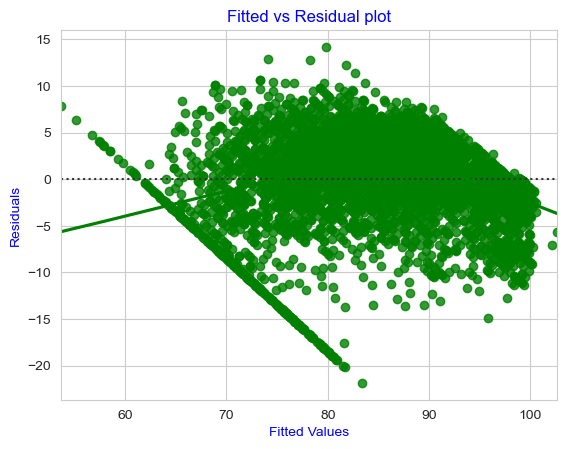

In [149]:
# let us plot the fitted values vs residuals

sns.set_style("whitegrid")
sns.residplot(data = df_pred,x="Fitted_values",y="Residuals", color='green', lowess=True)
plt.xlabel("Fitted Values",color ='blue')
plt.ylabel("Residuals",color ='blue')
plt.title("Fitted vs Residual plot",color ='blue')
plt.show()

**No pattern in the data thus the assumption of linearity and independence of predictors satisfied.**

In [150]:
X_train47.head(1)

const  lwrite   scall  swrite  exec     rchar       wchar  pgout  atch  \
694    1.0     1.0  1345.0   192.0   0.6  198703.0  230625.875    0.6   1.5   

     pgin  pflt  freemem   freeswap  runqsz_Not_CPU_Bound  
694   3.8  28.2    121.0  1375446.0                     0

In [151]:
col = compactive[['usr','lwrite','scall','swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'atch', 'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']]

<Axes: >

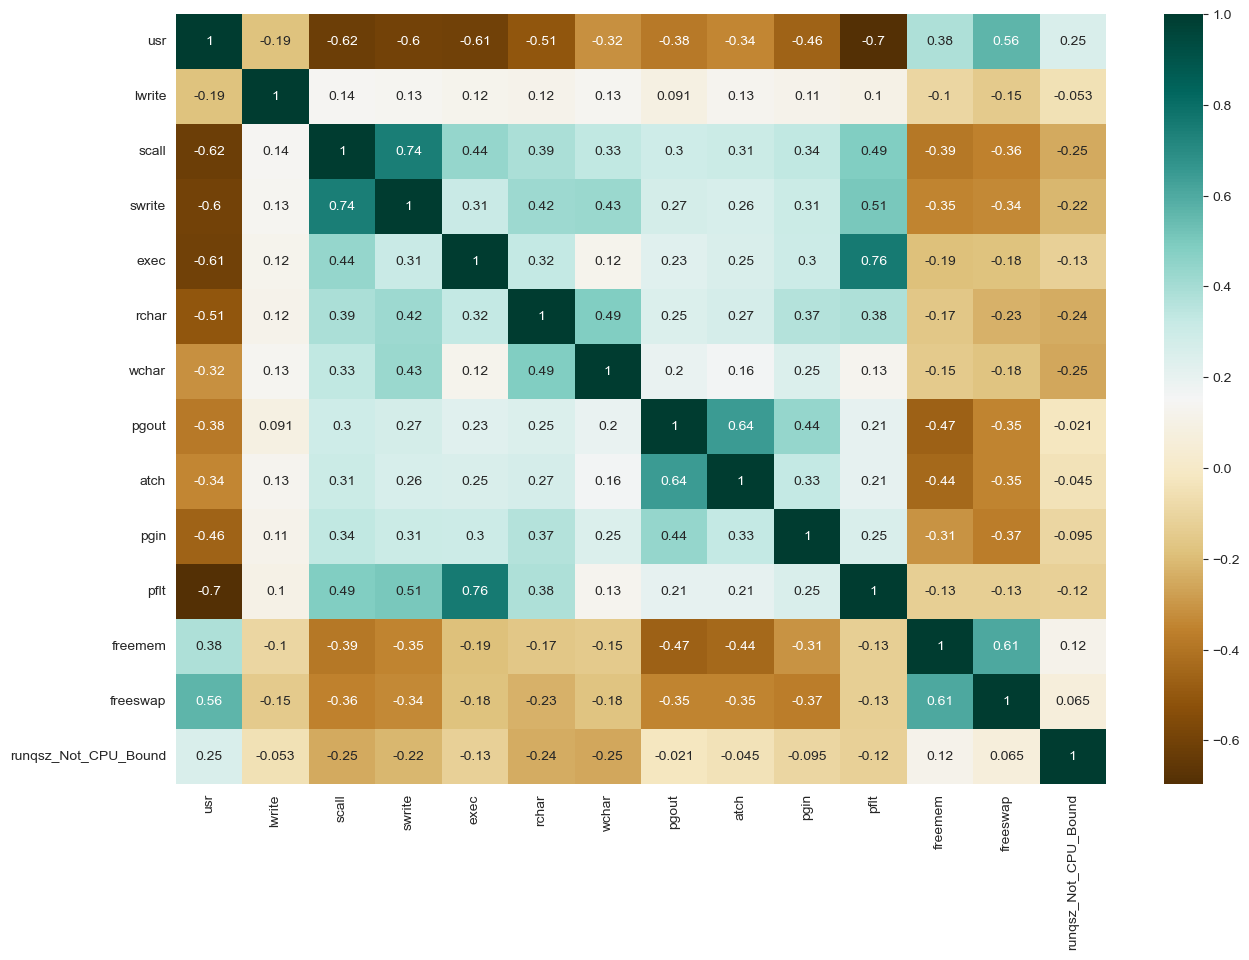

In [152]:
# mask = np.triu(np.ones_like(col.corr(), dtype=bool)) 
fig = plt.subplots(figsize=(15,10))
sns.heatmap(col.corr(),annot=True,cmap='BrBG')

**Test for Normality**


In [153]:
from scipy import stats
stats.shapiro(df_pred["Residuals"])

C:\Users\Shobha\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9425298571586609, pvalue=1.4881789691129557e-42)

In [154]:
1.4881789691129557e-42 < 0.05

True

* Since p-value < 0.05, the residuals are not normal as per shapiro test.

* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

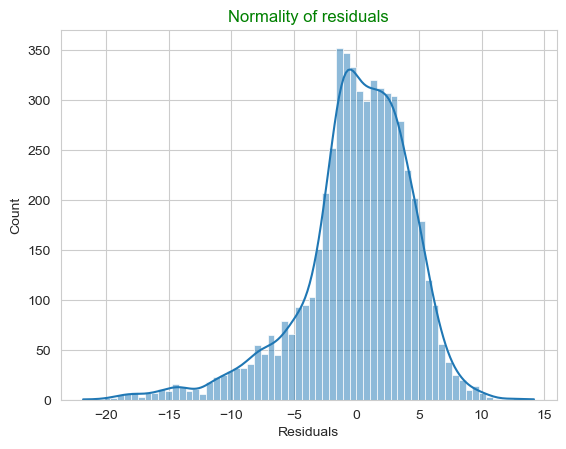

In [155]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals",color ='green')
plt.show()

* Since the Residuals doesn't seems to be normal we can transform one of the predictor scall to scall_sq to bring the Residuals to Normal

In [156]:
# using square transformation
X_train47["scall_sq"] = np.square(X_train47["scall"])

# let's create a model with the transformed data
model_52 = sm.OLS(y_train, X_train47)
olsres_52 = model_52.fit()
print(olsres_52.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1655.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:16:11   Log-Likelihood:                -16573.
No. Observations:                5734   AIC:                         3.318e+04
Df Residuals:                    5719   BIC:                         3.328e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   81.0901 

**After variable Transformation we noticed that the value of R-squared and Adjusted R-squared are also increased drastically which is a good sign for our model.**

* R-squared value = 0.802
* Adj. R-squared value = 0.802

In [157]:
df_pred1 = pd.DataFrame()

df_pred1['Actual_values'] = y_train.values.flatten() # actual values
df_pred1["Fitted_values"] = olsres_52.fittedvalues.values # predicted values
df_pred1['Residuals'] = olsres_52.resid.values # residuals

df_pred1.head()

Actual_values  Fitted_values  Residuals
0           91.0      90.540715   0.459285
1           94.0      92.020189   1.979811
2           61.5      75.487904 -13.987904
3           83.0      80.750907   2.249093
4           94.0      96.661837  -2.661837

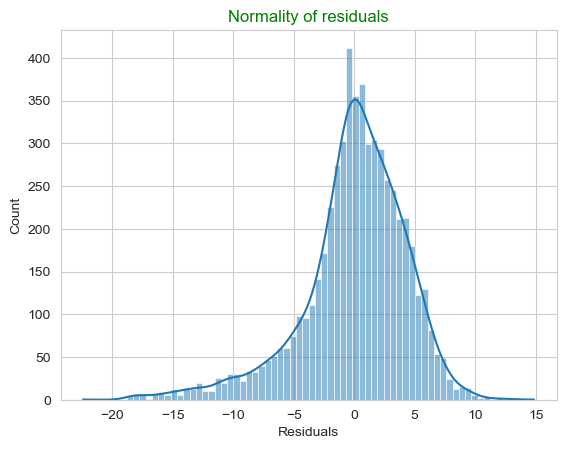

In [158]:
sns.histplot(df_pred1["Residuals"], kde=True)
plt.title("Normality of residuals",color ='green')
plt.show()

* The above histpot shows the Residuals are Normally distributed now after transformation.

**The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.**

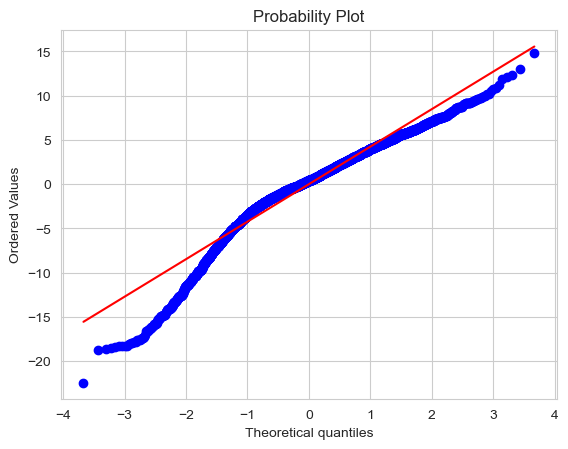

In [159]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred1['Residuals'], dist="norm", plot=pylab)
plt.show()

* Data points are closer to the line in QQ plot.
* Very few data points are lying on the straight line in QQ plot.

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

**The simplest way to detect heteroscedasticity is by creating a fitted value vs. residual plot.**
* The scatterplot below shows a typical fitted value vs. residual plot in which the residuals have constant variance at every level of x.
* Thus we can say that the residuals are homoscedastic.


Text(0.5, 1.0, 'Test for homoscedasticity')

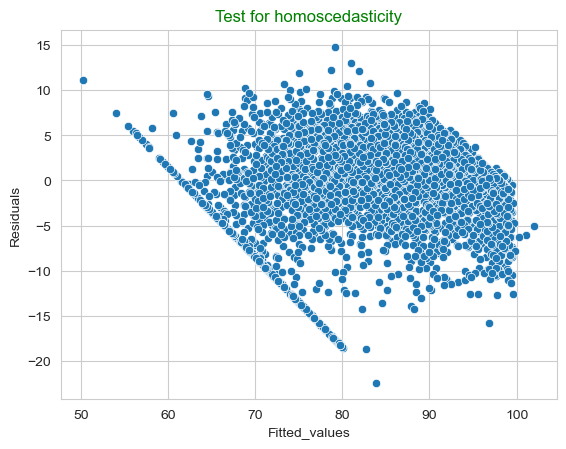

In [160]:
sns.scatterplot(data=df_pred1,x='Fitted_values',y='Residuals')
plt.title("Test for homoscedasticity",color = 'green')

In [161]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [162]:
name = ["F statistic", "p_value"]
test = sms.het_goldfeldquandt(df_pred1['Residuals'],X_train47)
lzip(name,test)

[('F statistic', 1.0988966818089467), ('p_value', 0.00590963103997442)]

In [163]:
0.00590963103997442 <0.05

True

**All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_52).**

In [164]:
print(olsres_52.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1655.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:16:31   Log-Likelihood:                -16573.
No. Observations:                5734   AIC:                         3.318e+04
Df Residuals:                    5719   BIC:                         3.328e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   81.0901 

### Observations

* R-squared of the model is 0.802 and adjusted R-squared is also 0.802, which shows that the model is able to explain ~80% variance in the data. This is quite good.

* A unit increase in the lwrite will result in a 0.0336 unit decrease in the usr, all other variables remaining constant.

* The usr of Not CPU Bounded will be 1.9173 units higher than a usr of CPU Bounded, all other variables remaining constant.



**Predictions**

**Let's print the linear regression equation.**

In [165]:
# let's check the model parameters

olsres_52.params

const                   8.109012e+01
lwrite                 -3.359964e-02
scall                   1.523618e-03
swrite                 -8.474347e-03
exec                   -4.445754e-01
rchar                  -5.442968e-06
wchar                  -4.555519e-06
pgout                  -3.196447e-01
atch                    5.636772e-01
pgin                   -1.073259e-01
pflt                   -4.128531e-02
freemem                -3.285562e-04
freeswap                9.476904e-06
runqsz_Not_CPU_Bound    1.917260e+00
scall_sq               -3.404883e-07
dtype: float64

In [166]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train47.columns)):
    if i == 0:
        print(olsres_52.params[i], "+", end=" ")
    elif i != len(X_train47.columns) - 1:
        print(
            olsres_52.params[i],
            "* (",
            X_train47.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_52.params[i], "* (", X_train47.columns[i], ")")

usr = 81.09011593776927 + -0.03359964065954595 * ( lwrite ) +  0.0015236175844430323 * ( scall ) +  -0.00847434700315516 * ( swrite ) +  -0.4445753808970566 * ( exec ) +  -5.442968448708459e-06 * ( rchar ) +  -4.555519240157551e-06 * ( wchar ) +  -0.31964472067471217 * ( pgout ) +  0.5636772219282964 * ( atch ) +  -0.10732589945944634 * ( pgin ) +  -0.04128531280093563 * ( pflt ) +  -0.0003285562364779736 * ( freemem ) +  9.476903926771167e-06 * ( freeswap ) +  1.917260136795174 * ( runqsz_Not_CPU_Bound ) +  -3.4048825066243266e-07 * ( scall_sq )


**We can now use the model for making predictions on the test data.**

In [167]:
X_train47.columns

Index(['const', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'atch', 'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound',
       'scall_sq'],
      dtype='object')

In [168]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [169]:
# dropping columns from the test data that are not there in the training data.

X_test2 = X_test.drop(['lread','sread','fork','ppgout','pgfree','ppgin','vflt'],axis=1)

In [170]:
# transforming the scall column in the test data corresponding to the training set.
X_test2['scall_sq'] = np.square(X_test2['scall'])

In [171]:
print(X_test2.shape)
print(X_train47.shape)

(2458, 15)
(5734, 15)


* Number of columns are same for both train and test set.

In [172]:
# let's make predictions on the test set

y_pred_test = olsres_52.predict(X_test2)
y_pred_train = olsres_52.predict(X_train47)

**Let's check model performance:**

In [173]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [174]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse1

4.354992605513227

In [175]:
# Another method
rmse = np.sqrt(mean_squared_error(y_train, df_pred1["Fitted_values"]))
rmse

4.354992605513227

In [176]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

4.551650464226139

In [177]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred1["Fitted_values"])
mae1

3.1918138704684407

In [178]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred_test)
mae2

3.2619385835954215

**Conclusions**
* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict 'usr' within a mean error of 3.2 units on the test data.
* Hence, we can conclude the model "olsres_52" is good for prediction as well as inference purposes.

#### Linear Regression using (sklearn)

In [179]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data

reg_model = LinearRegression()
reg_model.fit(X_train47, y_train)

LinearRegression()

In [180]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train47.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lwrite is -0.033599640659885084
The coefficient for scall is 0.0015236175844837825
The coefficient for swrite is -0.008474347003295664
The coefficient for exec is -0.44457538089708043
The coefficient for rchar is -5.442968448756593e-06
The coefficient for wchar is -4.555519240062784e-06
The coefficient for pgout is -0.3196447206740492
The coefficient for atch is 0.5636772219300579
The coefficient for pgin is -0.10732589945932837
The coefficient for pflt is -0.04128531280095425
The coefficient for freemem is -0.0003285562364759583
The coefficient for freeswap is 9.476903926759387e-06
The coefficient for runqsz_Not_CPU_Bound is 1.9172601367993287
The coefficient for scall_sq is -3.404882506774509e-07


In [181]:
# Let us check the intercept for the model

print("The intercept for our model is {}".format(reg_model.intercept_[0]))

The intercept for our model is 81.09011593775483


In [182]:
# R square on training data

reg_model.score(X_train47, y_train)

0.8020204374854508

* 80% of the variation in the 'usr' is explained by the predictors in the model for train set

In [183]:
#RMSE on Training data

pred_train = reg_model.fit(X_train47, y_train).predict(X_train47)
np.sqrt(mean_squared_error(y_train, pred_train))

4.354992605513227

In [184]:
#RMSE on Testing data

pred_test = reg_model.fit(X_train47, y_train).predict(X_test2)
np.sqrt(mean_squared_error(y_test, pred_test))

4.551650464230307

**1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

**Regression Plot between Actual Vs Fitted values:**

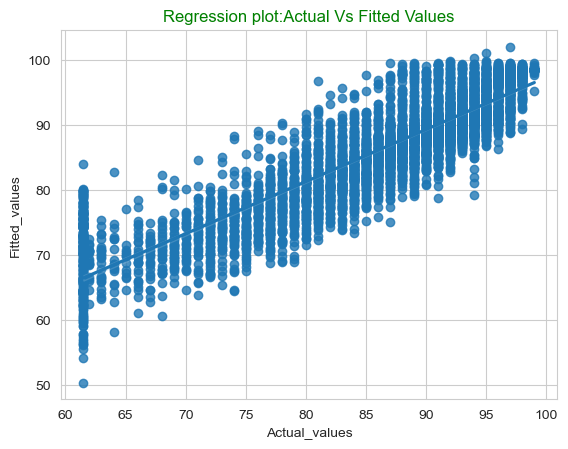

In [185]:
sns.regplot(data=df_pred1,x='Actual_values',y='Fitted_values')
plt.title("Regression plot:Actual Vs Fitted Values",color='green');

**Inferences:**

* Since this is regression model, we have plotted the plot between predicted y values and the actual y values for the test dataset.
* From the plot, it is visible that the actual and the predicted values are close enough.
* This shows that the model performed well on the data.

**We get the following Linear Regression equation from the final model:**

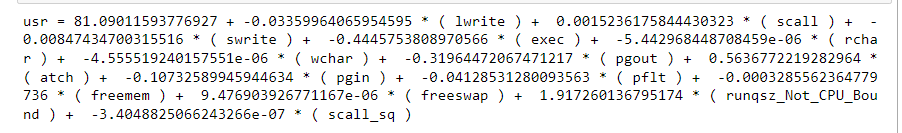

**Inferences:**
* When lwrite increases by 1 unit, usr decresse by 0.0335 units keeping all the predictors constant.
* When pgout increases by 1 unit usr increase by 0.5636 units keeping all the predictors constant.
* Similarly we can write infrerence for all other predictors.
* runsqz_Not_cpu_bound seems an important predictor as 1 unit increase in runsqz_not_cpu_bound usr increases by 1.917 units keeping all the predictors constant.(IMPORTANT ATTRIBUTE)

**Business Insights and Recomendations:**

* The important Attributes are runsqz_not_cpu_bound, scall, exec, rchar and atch.
* Portion of time (%) that cpus run in user mode and how each features effects can be predicted by the final Linear regression equation.
* runsqz_Not_cpu_bound  and atch seems an important predictor.

**Various Steps performed in building Linear Regression Model:**

* 1st we load the dataset and performed data analysis by using info() and describe function().
* We Visualized the data using Univariate, Bivaiate and Multivariate analysis.
* Done all the Missing value treatment, Outlier treatment,dummy encoding and converted the datatype to integer for our algorithm to perform model building.
* Train-Test split is done on the data for training and testing the model.
* We used both the sklearn and statsmodel algorithm to build the model.
* Variables are dropped to treat multicollinearity.
* Predictors having VIF > 5 are dropped such that it doesn't affect the adj.R-squared value.
* Assumptions of Linear Regression analysis done.
* Calculated the Performance metrices RMSE,MAE,Accuracy.

* R-squared value of Final model:

             *R-squared value = 0.802
             *Adj. R-squared value = 0.802